In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.lstm(x, hidden)
        output = self.fc(output)
        return output, hidden


x size (1, 256)
t size (1, 100)
u size (256, 100)


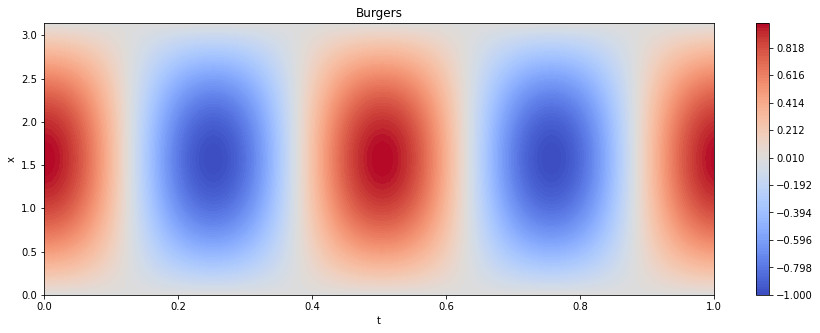

In [3]:
# importing data

# Load the .mat file
mat_data = scipy.io.loadmat('EB.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

#Use the loaded variables as needed
print("x size", x.shape)
print("t size", t.shape)
print("u size", u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [4]:
x1 = x.T
t1 = t.T

In [5]:
# Broadcasting to create the u_exact tensor with shape (100, 256)
u_exact = np.sin(x1)[:, np.newaxis] * np.cos(4 * np.pi * t1)

# Now, u_exact will have the shape (100, 256)

u_exact = u_exact.T
u_exact = torch.tensor(u_exact)
u_exact = torch.squeeze(u_exact)
u_exact.shape

torch.Size([100, 256])

In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 79
batch_size = 1
num_epochs = 200000

# Set random seed for reproducibility
torch.manual_seed(42)
u.shape

(256, 100)

In [7]:
input_data = u[:, 0:79]
target_data = u[:, 1:80]

test_data = u[ :, 79]
#test_target = u[:,80:100]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)


test data shape (256,)
input data shape (256, 79)
Target data shape (256, 79)
input tensor shape torch.Size([1, 79, 256])
Target tensor shape torch.Size([1, 79, 256])


In [8]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()
print(test_tensor.shape)

torch.Size([1, 1, 256])


In [9]:
# Create LSTM instance
lstm = LSTM(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state and cell state
    hidden = torch.zeros(1, batch_size, hidden_size)
    cell = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, (hidden, cell) = lstm(input_tensor, (hidden, cell))
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch: 10/200000, Loss: 0.0432
Epoch: 20/200000, Loss: 0.0168
Epoch: 30/200000, Loss: 0.0052
Epoch: 40/200000, Loss: 0.0027
Epoch: 50/200000, Loss: 0.0014
Epoch: 60/200000, Loss: 0.0009
Epoch: 70/200000, Loss: 0.0006
Epoch: 80/200000, Loss: 0.0005
Epoch: 90/200000, Loss: 0.0004
Epoch: 100/200000, Loss: 0.0003
Epoch: 110/200000, Loss: 0.0003
Epoch: 120/200000, Loss: 0.0002
Epoch: 130/200000, Loss: 0.0002
Epoch: 140/200000, Loss: 0.0002
Epoch: 150/200000, Loss: 0.0002
Epoch: 160/200000, Loss: 0.0001
Epoch: 170/200000, Loss: 0.0002
Epoch: 180/200000, Loss: 0.0002
Epoch: 190/200000, Loss: 0.0001
Epoch: 200/200000, Loss: 0.0001
Epoch: 210/200000, Loss: 0.0001
Epoch: 220/200000, Loss: 0.0004
Epoch: 230/200000, Loss: 0.0001
Epoch: 240/200000, Loss: 0.0001
Epoch: 250/200000, Loss: 0.0001
Epoch: 260/200000, Loss: 0.0001
Epoch: 270/200000, Loss: 0.0003
Epoch: 280/200000, Loss: 0.0001
Epoch: 290/200000, Loss: 0.0001
Epoch: 300/200000, Loss: 0.0001
Epoch: 310/200000, Loss: 0.0002
Epoch: 320/200000

Epoch: 2550/200000, Loss: 0.0000
Epoch: 2560/200000, Loss: 0.0000
Epoch: 2570/200000, Loss: 0.0000
Epoch: 2580/200000, Loss: 0.0000
Epoch: 2590/200000, Loss: 0.0000
Epoch: 2600/200000, Loss: 0.0001
Epoch: 2610/200000, Loss: 0.0000
Epoch: 2620/200000, Loss: 0.0000
Epoch: 2630/200000, Loss: 0.0000
Epoch: 2640/200000, Loss: 0.0000
Epoch: 2650/200000, Loss: 0.0000
Epoch: 2660/200000, Loss: 0.0001
Epoch: 2670/200000, Loss: 0.0000
Epoch: 2680/200000, Loss: 0.0000
Epoch: 2690/200000, Loss: 0.0000
Epoch: 2700/200000, Loss: 0.0000
Epoch: 2710/200000, Loss: 0.0001
Epoch: 2720/200000, Loss: 0.0000
Epoch: 2730/200000, Loss: 0.0000
Epoch: 2740/200000, Loss: 0.0000
Epoch: 2750/200000, Loss: 0.0000
Epoch: 2760/200000, Loss: 0.0000
Epoch: 2770/200000, Loss: 0.0000
Epoch: 2780/200000, Loss: 0.0000
Epoch: 2790/200000, Loss: 0.0000
Epoch: 2800/200000, Loss: 0.0000
Epoch: 2810/200000, Loss: 0.0000
Epoch: 2820/200000, Loss: 0.0000
Epoch: 2830/200000, Loss: 0.0000
Epoch: 2840/200000, Loss: 0.0000
Epoch: 285

Epoch: 5050/200000, Loss: 0.0000
Epoch: 5060/200000, Loss: 0.0000
Epoch: 5070/200000, Loss: 0.0000
Epoch: 5080/200000, Loss: 0.0000
Epoch: 5090/200000, Loss: 0.0000
Epoch: 5100/200000, Loss: 0.0000
Epoch: 5110/200000, Loss: 0.0002
Epoch: 5120/200000, Loss: 0.0001
Epoch: 5130/200000, Loss: 0.0000
Epoch: 5140/200000, Loss: 0.0000
Epoch: 5150/200000, Loss: 0.0000
Epoch: 5160/200000, Loss: 0.0000
Epoch: 5170/200000, Loss: 0.0000
Epoch: 5180/200000, Loss: 0.0000
Epoch: 5190/200000, Loss: 0.0000
Epoch: 5200/200000, Loss: 0.0000
Epoch: 5210/200000, Loss: 0.0000
Epoch: 5220/200000, Loss: 0.0000
Epoch: 5230/200000, Loss: 0.0000
Epoch: 5240/200000, Loss: 0.0000
Epoch: 5250/200000, Loss: 0.0000
Epoch: 5260/200000, Loss: 0.0000
Epoch: 5270/200000, Loss: 0.0000
Epoch: 5280/200000, Loss: 0.0000
Epoch: 5290/200000, Loss: 0.0000
Epoch: 5300/200000, Loss: 0.0000
Epoch: 5310/200000, Loss: 0.0001
Epoch: 5320/200000, Loss: 0.0000
Epoch: 5330/200000, Loss: 0.0000
Epoch: 5340/200000, Loss: 0.0000
Epoch: 535

Epoch: 7540/200000, Loss: 0.0000
Epoch: 7550/200000, Loss: 0.0000
Epoch: 7560/200000, Loss: 0.0000
Epoch: 7570/200000, Loss: 0.0000
Epoch: 7580/200000, Loss: 0.0000
Epoch: 7590/200000, Loss: 0.0000
Epoch: 7600/200000, Loss: 0.0000
Epoch: 7610/200000, Loss: 0.0000
Epoch: 7620/200000, Loss: 0.0000
Epoch: 7630/200000, Loss: 0.0000
Epoch: 7640/200000, Loss: 0.0000
Epoch: 7650/200000, Loss: 0.0000
Epoch: 7660/200000, Loss: 0.0000
Epoch: 7670/200000, Loss: 0.0000
Epoch: 7680/200000, Loss: 0.0000
Epoch: 7690/200000, Loss: 0.0001
Epoch: 7700/200000, Loss: 0.0000
Epoch: 7710/200000, Loss: 0.0000
Epoch: 7720/200000, Loss: 0.0000
Epoch: 7730/200000, Loss: 0.0000
Epoch: 7740/200000, Loss: 0.0000
Epoch: 7750/200000, Loss: 0.0000
Epoch: 7760/200000, Loss: 0.0000
Epoch: 7770/200000, Loss: 0.0000
Epoch: 7780/200000, Loss: 0.0000
Epoch: 7790/200000, Loss: 0.0000
Epoch: 7800/200000, Loss: 0.0000
Epoch: 7810/200000, Loss: 0.0000
Epoch: 7820/200000, Loss: 0.0000
Epoch: 7830/200000, Loss: 0.0000
Epoch: 784

Epoch: 10030/200000, Loss: 0.0000
Epoch: 10040/200000, Loss: 0.0000
Epoch: 10050/200000, Loss: 0.0000
Epoch: 10060/200000, Loss: 0.0000
Epoch: 10070/200000, Loss: 0.0000
Epoch: 10080/200000, Loss: 0.0000
Epoch: 10090/200000, Loss: 0.0000
Epoch: 10100/200000, Loss: 0.0000
Epoch: 10110/200000, Loss: 0.0000
Epoch: 10120/200000, Loss: 0.0000
Epoch: 10130/200000, Loss: 0.0000
Epoch: 10140/200000, Loss: 0.0000
Epoch: 10150/200000, Loss: 0.0000
Epoch: 10160/200000, Loss: 0.0000
Epoch: 10170/200000, Loss: 0.0000
Epoch: 10180/200000, Loss: 0.0000
Epoch: 10190/200000, Loss: 0.0000
Epoch: 10200/200000, Loss: 0.0000
Epoch: 10210/200000, Loss: 0.0000
Epoch: 10220/200000, Loss: 0.0000
Epoch: 10230/200000, Loss: 0.0000
Epoch: 10240/200000, Loss: 0.0000
Epoch: 10250/200000, Loss: 0.0000
Epoch: 10260/200000, Loss: 0.0000
Epoch: 10270/200000, Loss: 0.0000
Epoch: 10280/200000, Loss: 0.0000
Epoch: 10290/200000, Loss: 0.0000
Epoch: 10300/200000, Loss: 0.0000
Epoch: 10310/200000, Loss: 0.0000
Epoch: 10320/2

Epoch: 12460/200000, Loss: 0.0000
Epoch: 12470/200000, Loss: 0.0000
Epoch: 12480/200000, Loss: 0.0001
Epoch: 12490/200000, Loss: 0.0000
Epoch: 12500/200000, Loss: 0.0000
Epoch: 12510/200000, Loss: 0.0000
Epoch: 12520/200000, Loss: 0.0000
Epoch: 12530/200000, Loss: 0.0000
Epoch: 12540/200000, Loss: 0.0000
Epoch: 12550/200000, Loss: 0.0000
Epoch: 12560/200000, Loss: 0.0000
Epoch: 12570/200000, Loss: 0.0000
Epoch: 12580/200000, Loss: 0.0000
Epoch: 12590/200000, Loss: 0.0000
Epoch: 12600/200000, Loss: 0.0000
Epoch: 12610/200000, Loss: 0.0000
Epoch: 12620/200000, Loss: 0.0000
Epoch: 12630/200000, Loss: 0.0000
Epoch: 12640/200000, Loss: 0.0000
Epoch: 12650/200000, Loss: 0.0000
Epoch: 12660/200000, Loss: 0.0001
Epoch: 12670/200000, Loss: 0.0000
Epoch: 12680/200000, Loss: 0.0000
Epoch: 12690/200000, Loss: 0.0000
Epoch: 12700/200000, Loss: 0.0000
Epoch: 12710/200000, Loss: 0.0000
Epoch: 12720/200000, Loss: 0.0000
Epoch: 12730/200000, Loss: 0.0000
Epoch: 12740/200000, Loss: 0.0000
Epoch: 12750/2

Epoch: 14890/200000, Loss: 0.0001
Epoch: 14900/200000, Loss: 0.0001
Epoch: 14910/200000, Loss: 0.0001
Epoch: 14920/200000, Loss: 0.0001
Epoch: 14930/200000, Loss: 0.0001
Epoch: 14940/200000, Loss: 0.0003
Epoch: 14950/200000, Loss: 0.0005
Epoch: 14960/200000, Loss: 0.0003
Epoch: 14970/200000, Loss: 0.0002
Epoch: 14980/200000, Loss: 0.0002
Epoch: 14990/200000, Loss: 0.0002
Epoch: 15000/200000, Loss: 0.0002
Epoch: 15010/200000, Loss: 0.0001
Epoch: 15020/200000, Loss: 0.0001
Epoch: 15030/200000, Loss: 0.0001
Epoch: 15040/200000, Loss: 0.0001
Epoch: 15050/200000, Loss: 0.0001
Epoch: 15060/200000, Loss: 0.0001
Epoch: 15070/200000, Loss: 0.0001
Epoch: 15080/200000, Loss: 0.0001
Epoch: 15090/200000, Loss: 0.0001
Epoch: 15100/200000, Loss: 0.0001
Epoch: 15110/200000, Loss: 0.0001
Epoch: 15120/200000, Loss: 0.0001
Epoch: 15130/200000, Loss: 0.0001
Epoch: 15140/200000, Loss: 0.0001
Epoch: 15150/200000, Loss: 0.0001
Epoch: 15160/200000, Loss: 0.0001
Epoch: 15170/200000, Loss: 0.0001
Epoch: 15180/2

Epoch: 17320/200000, Loss: 0.0000
Epoch: 17330/200000, Loss: 0.0000
Epoch: 17340/200000, Loss: 0.0000
Epoch: 17350/200000, Loss: 0.0000
Epoch: 17360/200000, Loss: 0.0000
Epoch: 17370/200000, Loss: 0.0000
Epoch: 17380/200000, Loss: 0.0000
Epoch: 17390/200000, Loss: 0.0000
Epoch: 17400/200000, Loss: 0.0000
Epoch: 17410/200000, Loss: 0.0000
Epoch: 17420/200000, Loss: 0.0004
Epoch: 17430/200000, Loss: 0.0001
Epoch: 17440/200000, Loss: 0.0000
Epoch: 17450/200000, Loss: 0.0000
Epoch: 17460/200000, Loss: 0.0000
Epoch: 17470/200000, Loss: 0.0000
Epoch: 17480/200000, Loss: 0.0000
Epoch: 17490/200000, Loss: 0.0000
Epoch: 17500/200000, Loss: 0.0000
Epoch: 17510/200000, Loss: 0.0000
Epoch: 17520/200000, Loss: 0.0000
Epoch: 17530/200000, Loss: 0.0000
Epoch: 17540/200000, Loss: 0.0000
Epoch: 17550/200000, Loss: 0.0000
Epoch: 17560/200000, Loss: 0.0000
Epoch: 17570/200000, Loss: 0.0000
Epoch: 17580/200000, Loss: 0.0000
Epoch: 17590/200000, Loss: 0.0000
Epoch: 17600/200000, Loss: 0.0000
Epoch: 17610/2

Epoch: 19750/200000, Loss: 0.0001
Epoch: 19760/200000, Loss: 0.0000
Epoch: 19770/200000, Loss: 0.0000
Epoch: 19780/200000, Loss: 0.0000
Epoch: 19790/200000, Loss: 0.0000
Epoch: 19800/200000, Loss: 0.0000
Epoch: 19810/200000, Loss: 0.0000
Epoch: 19820/200000, Loss: 0.0000
Epoch: 19830/200000, Loss: 0.0000
Epoch: 19840/200000, Loss: 0.0000
Epoch: 19850/200000, Loss: 0.0000
Epoch: 19860/200000, Loss: 0.0000
Epoch: 19870/200000, Loss: 0.0000
Epoch: 19880/200000, Loss: 0.0000
Epoch: 19890/200000, Loss: 0.0000
Epoch: 19900/200000, Loss: 0.0000
Epoch: 19910/200000, Loss: 0.0000
Epoch: 19920/200000, Loss: 0.0000
Epoch: 19930/200000, Loss: 0.0000
Epoch: 19940/200000, Loss: 0.0000
Epoch: 19950/200000, Loss: 0.0000
Epoch: 19960/200000, Loss: 0.0000
Epoch: 19970/200000, Loss: 0.0000
Epoch: 19980/200000, Loss: 0.0001
Epoch: 19990/200000, Loss: 0.0000
Epoch: 20000/200000, Loss: 0.0000
Epoch: 20010/200000, Loss: 0.0000
Epoch: 20020/200000, Loss: 0.0000
Epoch: 20030/200000, Loss: 0.0000
Epoch: 20040/2

Epoch: 22180/200000, Loss: 0.0000
Epoch: 22190/200000, Loss: 0.0000
Epoch: 22200/200000, Loss: 0.0000
Epoch: 22210/200000, Loss: 0.0000
Epoch: 22220/200000, Loss: 0.0000
Epoch: 22230/200000, Loss: 0.0000
Epoch: 22240/200000, Loss: 0.0000
Epoch: 22250/200000, Loss: 0.0000
Epoch: 22260/200000, Loss: 0.0000
Epoch: 22270/200000, Loss: 0.0000
Epoch: 22280/200000, Loss: 0.0001
Epoch: 22290/200000, Loss: 0.0000
Epoch: 22300/200000, Loss: 0.0000
Epoch: 22310/200000, Loss: 0.0000
Epoch: 22320/200000, Loss: 0.0000
Epoch: 22330/200000, Loss: 0.0000
Epoch: 22340/200000, Loss: 0.0000
Epoch: 22350/200000, Loss: 0.0000
Epoch: 22360/200000, Loss: 0.0000
Epoch: 22370/200000, Loss: 0.0000
Epoch: 22380/200000, Loss: 0.0000
Epoch: 22390/200000, Loss: 0.0000
Epoch: 22400/200000, Loss: 0.0000
Epoch: 22410/200000, Loss: 0.0000
Epoch: 22420/200000, Loss: 0.0000
Epoch: 22430/200000, Loss: 0.0000
Epoch: 22440/200000, Loss: 0.0000
Epoch: 22450/200000, Loss: 0.0000
Epoch: 22460/200000, Loss: 0.0000
Epoch: 22470/2

Epoch: 24610/200000, Loss: 0.0000
Epoch: 24620/200000, Loss: 0.0000
Epoch: 24630/200000, Loss: 0.0000
Epoch: 24640/200000, Loss: 0.0000
Epoch: 24650/200000, Loss: 0.0000
Epoch: 24660/200000, Loss: 0.0000
Epoch: 24670/200000, Loss: 0.0000
Epoch: 24680/200000, Loss: 0.0000
Epoch: 24690/200000, Loss: 0.0000
Epoch: 24700/200000, Loss: 0.0000
Epoch: 24710/200000, Loss: 0.0000
Epoch: 24720/200000, Loss: 0.0000
Epoch: 24730/200000, Loss: 0.0000
Epoch: 24740/200000, Loss: 0.0000
Epoch: 24750/200000, Loss: 0.0000
Epoch: 24760/200000, Loss: 0.0000
Epoch: 24770/200000, Loss: 0.0000
Epoch: 24780/200000, Loss: 0.0000
Epoch: 24790/200000, Loss: 0.0000
Epoch: 24800/200000, Loss: 0.0000
Epoch: 24810/200000, Loss: 0.0000
Epoch: 24820/200000, Loss: 0.0000
Epoch: 24830/200000, Loss: 0.0000
Epoch: 24840/200000, Loss: 0.0000
Epoch: 24850/200000, Loss: 0.0000
Epoch: 24860/200000, Loss: 0.0000
Epoch: 24870/200000, Loss: 0.0000
Epoch: 24880/200000, Loss: 0.0000
Epoch: 24890/200000, Loss: 0.0000
Epoch: 24900/2

Epoch: 27040/200000, Loss: 0.0000
Epoch: 27050/200000, Loss: 0.0000
Epoch: 27060/200000, Loss: 0.0000
Epoch: 27070/200000, Loss: 0.0000
Epoch: 27080/200000, Loss: 0.0000
Epoch: 27090/200000, Loss: 0.0000
Epoch: 27100/200000, Loss: 0.0000
Epoch: 27110/200000, Loss: 0.0000
Epoch: 27120/200000, Loss: 0.0000
Epoch: 27130/200000, Loss: 0.0000
Epoch: 27140/200000, Loss: 0.0000
Epoch: 27150/200000, Loss: 0.0000
Epoch: 27160/200000, Loss: 0.0000
Epoch: 27170/200000, Loss: 0.0000
Epoch: 27180/200000, Loss: 0.0000
Epoch: 27190/200000, Loss: 0.0000
Epoch: 27200/200000, Loss: 0.0000
Epoch: 27210/200000, Loss: 0.0000
Epoch: 27220/200000, Loss: 0.0000
Epoch: 27230/200000, Loss: 0.0000
Epoch: 27240/200000, Loss: 0.0000
Epoch: 27250/200000, Loss: 0.0000
Epoch: 27260/200000, Loss: 0.0000
Epoch: 27270/200000, Loss: 0.0000
Epoch: 27280/200000, Loss: 0.0000
Epoch: 27290/200000, Loss: 0.0000
Epoch: 27300/200000, Loss: 0.0000
Epoch: 27310/200000, Loss: 0.0000
Epoch: 27320/200000, Loss: 0.0000
Epoch: 27330/2

Epoch: 29470/200000, Loss: 0.0000
Epoch: 29480/200000, Loss: 0.0000
Epoch: 29490/200000, Loss: 0.0000
Epoch: 29500/200000, Loss: 0.0001
Epoch: 29510/200000, Loss: 0.0000
Epoch: 29520/200000, Loss: 0.0000
Epoch: 29530/200000, Loss: 0.0000
Epoch: 29540/200000, Loss: 0.0000
Epoch: 29550/200000, Loss: 0.0000
Epoch: 29560/200000, Loss: 0.0000
Epoch: 29570/200000, Loss: 0.0000
Epoch: 29580/200000, Loss: 0.0000
Epoch: 29590/200000, Loss: 0.0000
Epoch: 29600/200000, Loss: 0.0000
Epoch: 29610/200000, Loss: 0.0000
Epoch: 29620/200000, Loss: 0.0000
Epoch: 29630/200000, Loss: 0.0000
Epoch: 29640/200000, Loss: 0.0000
Epoch: 29650/200000, Loss: 0.0000
Epoch: 29660/200000, Loss: 0.0001
Epoch: 29670/200000, Loss: 0.0001
Epoch: 29680/200000, Loss: 0.0001
Epoch: 29690/200000, Loss: 0.0000
Epoch: 29700/200000, Loss: 0.0000
Epoch: 29710/200000, Loss: 0.0000
Epoch: 29720/200000, Loss: 0.0000
Epoch: 29730/200000, Loss: 0.0000
Epoch: 29740/200000, Loss: 0.0000
Epoch: 29750/200000, Loss: 0.0000
Epoch: 29760/2

Epoch: 31900/200000, Loss: 0.0000
Epoch: 31910/200000, Loss: 0.0000
Epoch: 31920/200000, Loss: 0.0000
Epoch: 31930/200000, Loss: 0.0000
Epoch: 31940/200000, Loss: 0.0000
Epoch: 31950/200000, Loss: 0.0000
Epoch: 31960/200000, Loss: 0.0000
Epoch: 31970/200000, Loss: 0.0001
Epoch: 31980/200000, Loss: 0.0001
Epoch: 31990/200000, Loss: 0.0000
Epoch: 32000/200000, Loss: 0.0000
Epoch: 32010/200000, Loss: 0.0000
Epoch: 32020/200000, Loss: 0.0000
Epoch: 32030/200000, Loss: 0.0000
Epoch: 32040/200000, Loss: 0.0000
Epoch: 32050/200000, Loss: 0.0000
Epoch: 32060/200000, Loss: 0.0000
Epoch: 32070/200000, Loss: 0.0000
Epoch: 32080/200000, Loss: 0.0000
Epoch: 32090/200000, Loss: 0.0000
Epoch: 32100/200000, Loss: 0.0000
Epoch: 32110/200000, Loss: 0.0000
Epoch: 32120/200000, Loss: 0.0000
Epoch: 32130/200000, Loss: 0.0001
Epoch: 32140/200000, Loss: 0.0001
Epoch: 32150/200000, Loss: 0.0000
Epoch: 32160/200000, Loss: 0.0000
Epoch: 32170/200000, Loss: 0.0000
Epoch: 32180/200000, Loss: 0.0000
Epoch: 32190/2

Epoch: 34330/200000, Loss: 0.0000
Epoch: 34340/200000, Loss: 0.0000
Epoch: 34350/200000, Loss: 0.0000
Epoch: 34360/200000, Loss: 0.0000
Epoch: 34370/200000, Loss: 0.0000
Epoch: 34380/200000, Loss: 0.0000
Epoch: 34390/200000, Loss: 0.0000
Epoch: 34400/200000, Loss: 0.0000
Epoch: 34410/200000, Loss: 0.0000
Epoch: 34420/200000, Loss: 0.0000
Epoch: 34430/200000, Loss: 0.0000
Epoch: 34440/200000, Loss: 0.0000
Epoch: 34450/200000, Loss: 0.0000
Epoch: 34460/200000, Loss: 0.0000
Epoch: 34470/200000, Loss: 0.0000
Epoch: 34480/200000, Loss: 0.0000
Epoch: 34490/200000, Loss: 0.0000
Epoch: 34500/200000, Loss: 0.0000
Epoch: 34510/200000, Loss: 0.0000
Epoch: 34520/200000, Loss: 0.0000
Epoch: 34530/200000, Loss: 0.0000
Epoch: 34540/200000, Loss: 0.0000
Epoch: 34550/200000, Loss: 0.0000
Epoch: 34560/200000, Loss: 0.0000
Epoch: 34570/200000, Loss: 0.0000
Epoch: 34580/200000, Loss: 0.0000
Epoch: 34590/200000, Loss: 0.0000
Epoch: 34600/200000, Loss: 0.0000
Epoch: 34610/200000, Loss: 0.0000
Epoch: 34620/2

Epoch: 36760/200000, Loss: 0.0000
Epoch: 36770/200000, Loss: 0.0000
Epoch: 36780/200000, Loss: 0.0000
Epoch: 36790/200000, Loss: 0.0000
Epoch: 36800/200000, Loss: 0.0000
Epoch: 36810/200000, Loss: 0.0000
Epoch: 36820/200000, Loss: 0.0000
Epoch: 36830/200000, Loss: 0.0000
Epoch: 36840/200000, Loss: 0.0000
Epoch: 36850/200000, Loss: 0.0000
Epoch: 36860/200000, Loss: 0.0000
Epoch: 36870/200000, Loss: 0.0000
Epoch: 36880/200000, Loss: 0.0000
Epoch: 36890/200000, Loss: 0.0000
Epoch: 36900/200000, Loss: 0.0000
Epoch: 36910/200000, Loss: 0.0000
Epoch: 36920/200000, Loss: 0.0000
Epoch: 36930/200000, Loss: 0.0000
Epoch: 36940/200000, Loss: 0.0000
Epoch: 36950/200000, Loss: 0.0000
Epoch: 36960/200000, Loss: 0.0000
Epoch: 36970/200000, Loss: 0.0000
Epoch: 36980/200000, Loss: 0.0000
Epoch: 36990/200000, Loss: 0.0000
Epoch: 37000/200000, Loss: 0.0000
Epoch: 37010/200000, Loss: 0.0000
Epoch: 37020/200000, Loss: 0.0000
Epoch: 37030/200000, Loss: 0.0000
Epoch: 37040/200000, Loss: 0.0000
Epoch: 37050/2

Epoch: 39190/200000, Loss: 0.0000
Epoch: 39200/200000, Loss: 0.0000
Epoch: 39210/200000, Loss: 0.0000
Epoch: 39220/200000, Loss: 0.0000
Epoch: 39230/200000, Loss: 0.0000
Epoch: 39240/200000, Loss: 0.0000
Epoch: 39250/200000, Loss: 0.0000
Epoch: 39260/200000, Loss: 0.0000
Epoch: 39270/200000, Loss: 0.0000
Epoch: 39280/200000, Loss: 0.0000
Epoch: 39290/200000, Loss: 0.0000
Epoch: 39300/200000, Loss: 0.0000
Epoch: 39310/200000, Loss: 0.0000
Epoch: 39320/200000, Loss: 0.0000
Epoch: 39330/200000, Loss: 0.0000
Epoch: 39340/200000, Loss: 0.0000
Epoch: 39350/200000, Loss: 0.0000
Epoch: 39360/200000, Loss: 0.0000
Epoch: 39370/200000, Loss: 0.0000
Epoch: 39380/200000, Loss: 0.0000
Epoch: 39390/200000, Loss: 0.0000
Epoch: 39400/200000, Loss: 0.0000
Epoch: 39410/200000, Loss: 0.0000
Epoch: 39420/200000, Loss: 0.0000
Epoch: 39430/200000, Loss: 0.0000
Epoch: 39440/200000, Loss: 0.0000
Epoch: 39450/200000, Loss: 0.0000
Epoch: 39460/200000, Loss: 0.0000
Epoch: 39470/200000, Loss: 0.0000
Epoch: 39480/2

Epoch: 41620/200000, Loss: 0.0000
Epoch: 41630/200000, Loss: 0.0000
Epoch: 41640/200000, Loss: 0.0000
Epoch: 41650/200000, Loss: 0.0000
Epoch: 41660/200000, Loss: 0.0000
Epoch: 41670/200000, Loss: 0.0000
Epoch: 41680/200000, Loss: 0.0000
Epoch: 41690/200000, Loss: 0.0000
Epoch: 41700/200000, Loss: 0.0000
Epoch: 41710/200000, Loss: 0.0000
Epoch: 41720/200000, Loss: 0.0000
Epoch: 41730/200000, Loss: 0.0000
Epoch: 41740/200000, Loss: 0.0000
Epoch: 41750/200000, Loss: 0.0000
Epoch: 41760/200000, Loss: 0.0000
Epoch: 41770/200000, Loss: 0.0000
Epoch: 41780/200000, Loss: 0.0000
Epoch: 41790/200000, Loss: 0.0000
Epoch: 41800/200000, Loss: 0.0000
Epoch: 41810/200000, Loss: 0.0000
Epoch: 41820/200000, Loss: 0.0000
Epoch: 41830/200000, Loss: 0.0000
Epoch: 41840/200000, Loss: 0.0000
Epoch: 41850/200000, Loss: 0.0000
Epoch: 41860/200000, Loss: 0.0000
Epoch: 41870/200000, Loss: 0.0000
Epoch: 41880/200000, Loss: 0.0000
Epoch: 41890/200000, Loss: 0.0000
Epoch: 41900/200000, Loss: 0.0000
Epoch: 41910/2

Epoch: 44050/200000, Loss: 0.0000
Epoch: 44060/200000, Loss: 0.0000
Epoch: 44070/200000, Loss: 0.0000
Epoch: 44080/200000, Loss: 0.0000
Epoch: 44090/200000, Loss: 0.0000
Epoch: 44100/200000, Loss: 0.0000
Epoch: 44110/200000, Loss: 0.0000
Epoch: 44120/200000, Loss: 0.0000
Epoch: 44130/200000, Loss: 0.0000
Epoch: 44140/200000, Loss: 0.0000
Epoch: 44150/200000, Loss: 0.0000
Epoch: 44160/200000, Loss: 0.0000
Epoch: 44170/200000, Loss: 0.0000
Epoch: 44180/200000, Loss: 0.0000
Epoch: 44190/200000, Loss: 0.0000
Epoch: 44200/200000, Loss: 0.0000
Epoch: 44210/200000, Loss: 0.0000
Epoch: 44220/200000, Loss: 0.0000
Epoch: 44230/200000, Loss: 0.0000
Epoch: 44240/200000, Loss: 0.0000
Epoch: 44250/200000, Loss: 0.0000
Epoch: 44260/200000, Loss: 0.0000
Epoch: 44270/200000, Loss: 0.0000
Epoch: 44280/200000, Loss: 0.0000
Epoch: 44290/200000, Loss: 0.0000
Epoch: 44300/200000, Loss: 0.0000
Epoch: 44310/200000, Loss: 0.0000
Epoch: 44320/200000, Loss: 0.0000
Epoch: 44330/200000, Loss: 0.0000
Epoch: 44340/2

Epoch: 46480/200000, Loss: 0.0000
Epoch: 46490/200000, Loss: 0.0000
Epoch: 46500/200000, Loss: 0.0000
Epoch: 46510/200000, Loss: 0.0000
Epoch: 46520/200000, Loss: 0.0000
Epoch: 46530/200000, Loss: 0.0000
Epoch: 46540/200000, Loss: 0.0000
Epoch: 46550/200000, Loss: 0.0000
Epoch: 46560/200000, Loss: 0.0000
Epoch: 46570/200000, Loss: 0.0000
Epoch: 46580/200000, Loss: 0.0000
Epoch: 46590/200000, Loss: 0.0000
Epoch: 46600/200000, Loss: 0.0000
Epoch: 46610/200000, Loss: 0.0000
Epoch: 46620/200000, Loss: 0.0000
Epoch: 46630/200000, Loss: 0.0000
Epoch: 46640/200000, Loss: 0.0000
Epoch: 46650/200000, Loss: 0.0000
Epoch: 46660/200000, Loss: 0.0000
Epoch: 46670/200000, Loss: 0.0000
Epoch: 46680/200000, Loss: 0.0000
Epoch: 46690/200000, Loss: 0.0000
Epoch: 46700/200000, Loss: 0.0000
Epoch: 46710/200000, Loss: 0.0000
Epoch: 46720/200000, Loss: 0.0000
Epoch: 46730/200000, Loss: 0.0000
Epoch: 46740/200000, Loss: 0.0000
Epoch: 46750/200000, Loss: 0.0000
Epoch: 46760/200000, Loss: 0.0000
Epoch: 46770/2

Epoch: 48910/200000, Loss: 0.0000
Epoch: 48920/200000, Loss: 0.0000
Epoch: 48930/200000, Loss: 0.0000
Epoch: 48940/200000, Loss: 0.0000
Epoch: 48950/200000, Loss: 0.0000
Epoch: 48960/200000, Loss: 0.0000
Epoch: 48970/200000, Loss: 0.0000
Epoch: 48980/200000, Loss: 0.0000
Epoch: 48990/200000, Loss: 0.0000
Epoch: 49000/200000, Loss: 0.0000
Epoch: 49010/200000, Loss: 0.0000
Epoch: 49020/200000, Loss: 0.0000
Epoch: 49030/200000, Loss: 0.0000
Epoch: 49040/200000, Loss: 0.0000
Epoch: 49050/200000, Loss: 0.0000
Epoch: 49060/200000, Loss: 0.0000
Epoch: 49070/200000, Loss: 0.0000
Epoch: 49080/200000, Loss: 0.0000
Epoch: 49090/200000, Loss: 0.0000
Epoch: 49100/200000, Loss: 0.0000
Epoch: 49110/200000, Loss: 0.0000
Epoch: 49120/200000, Loss: 0.0000
Epoch: 49130/200000, Loss: 0.0000
Epoch: 49140/200000, Loss: 0.0000
Epoch: 49150/200000, Loss: 0.0000
Epoch: 49160/200000, Loss: 0.0000
Epoch: 49170/200000, Loss: 0.0000
Epoch: 49180/200000, Loss: 0.0000
Epoch: 49190/200000, Loss: 0.0000
Epoch: 49200/2

Epoch: 51340/200000, Loss: 0.0000
Epoch: 51350/200000, Loss: 0.0000
Epoch: 51360/200000, Loss: 0.0000
Epoch: 51370/200000, Loss: 0.0000
Epoch: 51380/200000, Loss: 0.0000
Epoch: 51390/200000, Loss: 0.0000
Epoch: 51400/200000, Loss: 0.0000
Epoch: 51410/200000, Loss: 0.0000
Epoch: 51420/200000, Loss: 0.0000
Epoch: 51430/200000, Loss: 0.0000
Epoch: 51440/200000, Loss: 0.0000
Epoch: 51450/200000, Loss: 0.0000
Epoch: 51460/200000, Loss: 0.0000
Epoch: 51470/200000, Loss: 0.0000
Epoch: 51480/200000, Loss: 0.0000
Epoch: 51490/200000, Loss: 0.0000
Epoch: 51500/200000, Loss: 0.0000
Epoch: 51510/200000, Loss: 0.0000
Epoch: 51520/200000, Loss: 0.0000
Epoch: 51530/200000, Loss: 0.0000
Epoch: 51540/200000, Loss: 0.0000
Epoch: 51550/200000, Loss: 0.0000
Epoch: 51560/200000, Loss: 0.0000
Epoch: 51570/200000, Loss: 0.0000
Epoch: 51580/200000, Loss: 0.0000
Epoch: 51590/200000, Loss: 0.0000
Epoch: 51600/200000, Loss: 0.0000
Epoch: 51610/200000, Loss: 0.0000
Epoch: 51620/200000, Loss: 0.0000
Epoch: 51630/2

Epoch: 53770/200000, Loss: 0.0000
Epoch: 53780/200000, Loss: 0.0000
Epoch: 53790/200000, Loss: 0.0000
Epoch: 53800/200000, Loss: 0.0000
Epoch: 53810/200000, Loss: 0.0000
Epoch: 53820/200000, Loss: 0.0000
Epoch: 53830/200000, Loss: 0.0000
Epoch: 53840/200000, Loss: 0.0000
Epoch: 53850/200000, Loss: 0.0000
Epoch: 53860/200000, Loss: 0.0000
Epoch: 53870/200000, Loss: 0.0000
Epoch: 53880/200000, Loss: 0.0000
Epoch: 53890/200000, Loss: 0.0000
Epoch: 53900/200000, Loss: 0.0000
Epoch: 53910/200000, Loss: 0.0000
Epoch: 53920/200000, Loss: 0.0000
Epoch: 53930/200000, Loss: 0.0000
Epoch: 53940/200000, Loss: 0.0000
Epoch: 53950/200000, Loss: 0.0000
Epoch: 53960/200000, Loss: 0.0000
Epoch: 53970/200000, Loss: 0.0000
Epoch: 53980/200000, Loss: 0.0000
Epoch: 53990/200000, Loss: 0.0000
Epoch: 54000/200000, Loss: 0.0000
Epoch: 54010/200000, Loss: 0.0000
Epoch: 54020/200000, Loss: 0.0000
Epoch: 54030/200000, Loss: 0.0000
Epoch: 54040/200000, Loss: 0.0000
Epoch: 54050/200000, Loss: 0.0000
Epoch: 54060/2

Epoch: 56200/200000, Loss: 0.0000
Epoch: 56210/200000, Loss: 0.0000
Epoch: 56220/200000, Loss: 0.0000
Epoch: 56230/200000, Loss: 0.0000
Epoch: 56240/200000, Loss: 0.0000
Epoch: 56250/200000, Loss: 0.0000
Epoch: 56260/200000, Loss: 0.0000
Epoch: 56270/200000, Loss: 0.0000
Epoch: 56280/200000, Loss: 0.0000
Epoch: 56290/200000, Loss: 0.0000
Epoch: 56300/200000, Loss: 0.0000
Epoch: 56310/200000, Loss: 0.0000
Epoch: 56320/200000, Loss: 0.0000
Epoch: 56330/200000, Loss: 0.0000
Epoch: 56340/200000, Loss: 0.0000
Epoch: 56350/200000, Loss: 0.0000
Epoch: 56360/200000, Loss: 0.0000
Epoch: 56370/200000, Loss: 0.0000
Epoch: 56380/200000, Loss: 0.0000
Epoch: 56390/200000, Loss: 0.0000
Epoch: 56400/200000, Loss: 0.0000
Epoch: 56410/200000, Loss: 0.0000
Epoch: 56420/200000, Loss: 0.0000
Epoch: 56430/200000, Loss: 0.0000
Epoch: 56440/200000, Loss: 0.0000
Epoch: 56450/200000, Loss: 0.0000
Epoch: 56460/200000, Loss: 0.0000
Epoch: 56470/200000, Loss: 0.0000
Epoch: 56480/200000, Loss: 0.0000
Epoch: 56490/2

Epoch: 58620/200000, Loss: 0.0000
Epoch: 58630/200000, Loss: 0.0000
Epoch: 58640/200000, Loss: 0.0000
Epoch: 58650/200000, Loss: 0.0000
Epoch: 58660/200000, Loss: 0.0000
Epoch: 58670/200000, Loss: 0.0000
Epoch: 58680/200000, Loss: 0.0000
Epoch: 58690/200000, Loss: 0.0000
Epoch: 58700/200000, Loss: 0.0000
Epoch: 58710/200000, Loss: 0.0000
Epoch: 58720/200000, Loss: 0.0000
Epoch: 58730/200000, Loss: 0.0000
Epoch: 58740/200000, Loss: 0.0000
Epoch: 58750/200000, Loss: 0.0000
Epoch: 58760/200000, Loss: 0.0000
Epoch: 58770/200000, Loss: 0.0000
Epoch: 58780/200000, Loss: 0.0000
Epoch: 58790/200000, Loss: 0.0000
Epoch: 58800/200000, Loss: 0.0000
Epoch: 58810/200000, Loss: 0.0000
Epoch: 58820/200000, Loss: 0.0000
Epoch: 58830/200000, Loss: 0.0000
Epoch: 58840/200000, Loss: 0.0000
Epoch: 58850/200000, Loss: 0.0000
Epoch: 58860/200000, Loss: 0.0000
Epoch: 58870/200000, Loss: 0.0000
Epoch: 58880/200000, Loss: 0.0000
Epoch: 58890/200000, Loss: 0.0000
Epoch: 58900/200000, Loss: 0.0000
Epoch: 58910/2

Epoch: 61040/200000, Loss: 0.0000
Epoch: 61050/200000, Loss: 0.0000
Epoch: 61060/200000, Loss: 0.0000
Epoch: 61070/200000, Loss: 0.0000
Epoch: 61080/200000, Loss: 0.0000
Epoch: 61090/200000, Loss: 0.0000
Epoch: 61100/200000, Loss: 0.0000
Epoch: 61110/200000, Loss: 0.0000
Epoch: 61120/200000, Loss: 0.0000
Epoch: 61130/200000, Loss: 0.0000
Epoch: 61140/200000, Loss: 0.0000
Epoch: 61150/200000, Loss: 0.0000
Epoch: 61160/200000, Loss: 0.0000
Epoch: 61170/200000, Loss: 0.0000
Epoch: 61180/200000, Loss: 0.0000
Epoch: 61190/200000, Loss: 0.0000
Epoch: 61200/200000, Loss: 0.0000
Epoch: 61210/200000, Loss: 0.0000
Epoch: 61220/200000, Loss: 0.0000
Epoch: 61230/200000, Loss: 0.0000
Epoch: 61240/200000, Loss: 0.0000
Epoch: 61250/200000, Loss: 0.0000
Epoch: 61260/200000, Loss: 0.0000
Epoch: 61270/200000, Loss: 0.0000
Epoch: 61280/200000, Loss: 0.0000
Epoch: 61290/200000, Loss: 0.0000
Epoch: 61300/200000, Loss: 0.0000
Epoch: 61310/200000, Loss: 0.0000
Epoch: 61320/200000, Loss: 0.0000
Epoch: 61330/2

Epoch: 63460/200000, Loss: 0.0002
Epoch: 63470/200000, Loss: 0.0001
Epoch: 63480/200000, Loss: 0.0001
Epoch: 63490/200000, Loss: 0.0001
Epoch: 63500/200000, Loss: 0.0001
Epoch: 63510/200000, Loss: 0.0001
Epoch: 63520/200000, Loss: 0.0001
Epoch: 63530/200000, Loss: 0.0001
Epoch: 63540/200000, Loss: 0.0001
Epoch: 63550/200000, Loss: 0.0001
Epoch: 63560/200000, Loss: 0.0001
Epoch: 63570/200000, Loss: 0.0001
Epoch: 63580/200000, Loss: 0.0001
Epoch: 63590/200000, Loss: 0.0001
Epoch: 63600/200000, Loss: 0.0001
Epoch: 63610/200000, Loss: 0.0001
Epoch: 63620/200000, Loss: 0.0001
Epoch: 63630/200000, Loss: 0.0001
Epoch: 63640/200000, Loss: 0.0001
Epoch: 63650/200000, Loss: 0.0001
Epoch: 63660/200000, Loss: 0.0001
Epoch: 63670/200000, Loss: 0.0001
Epoch: 63680/200000, Loss: 0.0001
Epoch: 63690/200000, Loss: 0.0001
Epoch: 63700/200000, Loss: 0.0001
Epoch: 63710/200000, Loss: 0.0002
Epoch: 63720/200000, Loss: 0.0004
Epoch: 63730/200000, Loss: 0.0002
Epoch: 63740/200000, Loss: 0.0002
Epoch: 63750/2

Epoch: 65880/200000, Loss: 0.0001
Epoch: 65890/200000, Loss: 0.0001
Epoch: 65900/200000, Loss: 0.0001
Epoch: 65910/200000, Loss: 0.0001
Epoch: 65920/200000, Loss: 0.0001
Epoch: 65930/200000, Loss: 0.0001
Epoch: 65940/200000, Loss: 0.0001
Epoch: 65950/200000, Loss: 0.0001
Epoch: 65960/200000, Loss: 0.0001
Epoch: 65970/200000, Loss: 0.0002
Epoch: 65980/200000, Loss: 0.0001
Epoch: 65990/200000, Loss: 0.0001
Epoch: 66000/200000, Loss: 0.0001
Epoch: 66010/200000, Loss: 0.0001
Epoch: 66020/200000, Loss: 0.0001
Epoch: 66030/200000, Loss: 0.0001
Epoch: 66040/200000, Loss: 0.0001
Epoch: 66050/200000, Loss: 0.0001
Epoch: 66060/200000, Loss: 0.0001
Epoch: 66070/200000, Loss: 0.0001
Epoch: 66080/200000, Loss: 0.0001
Epoch: 66090/200000, Loss: 0.0001
Epoch: 66100/200000, Loss: 0.0001
Epoch: 66110/200000, Loss: 0.0001
Epoch: 66120/200000, Loss: 0.0001
Epoch: 66130/200000, Loss: 0.0001
Epoch: 66140/200000, Loss: 0.0001
Epoch: 66150/200000, Loss: 0.0001
Epoch: 66160/200000, Loss: 0.0001
Epoch: 66170/2

Epoch: 68300/200000, Loss: 0.0002
Epoch: 68310/200000, Loss: 0.0001
Epoch: 68320/200000, Loss: 0.0000
Epoch: 68330/200000, Loss: 0.0000
Epoch: 68340/200000, Loss: 0.0000
Epoch: 68350/200000, Loss: 0.0000
Epoch: 68360/200000, Loss: 0.0001
Epoch: 68370/200000, Loss: 0.0000
Epoch: 68380/200000, Loss: 0.0000
Epoch: 68390/200000, Loss: 0.0000
Epoch: 68400/200000, Loss: 0.0000
Epoch: 68410/200000, Loss: 0.0000
Epoch: 68420/200000, Loss: 0.0001
Epoch: 68430/200000, Loss: 0.0000
Epoch: 68440/200000, Loss: 0.0000
Epoch: 68450/200000, Loss: 0.0000
Epoch: 68460/200000, Loss: 0.0000
Epoch: 68470/200000, Loss: 0.0001
Epoch: 68480/200000, Loss: 0.0000
Epoch: 68490/200000, Loss: 0.0000
Epoch: 68500/200000, Loss: 0.0000
Epoch: 68510/200000, Loss: 0.0000
Epoch: 68520/200000, Loss: 0.0001
Epoch: 68530/200000, Loss: 0.0001
Epoch: 68540/200000, Loss: 0.0000
Epoch: 68550/200000, Loss: 0.0000
Epoch: 68560/200000, Loss: 0.0000
Epoch: 68570/200000, Loss: 0.0000
Epoch: 68580/200000, Loss: 0.0000
Epoch: 68590/2

Epoch: 70720/200000, Loss: 0.0001
Epoch: 70730/200000, Loss: 0.0000
Epoch: 70740/200000, Loss: 0.0000
Epoch: 70750/200000, Loss: 0.0000
Epoch: 70760/200000, Loss: 0.0000
Epoch: 70770/200000, Loss: 0.0000
Epoch: 70780/200000, Loss: 0.0000
Epoch: 70790/200000, Loss: 0.0001
Epoch: 70800/200000, Loss: 0.0000
Epoch: 70810/200000, Loss: 0.0000
Epoch: 70820/200000, Loss: 0.0000
Epoch: 70830/200000, Loss: 0.0000
Epoch: 70840/200000, Loss: 0.0000
Epoch: 70850/200000, Loss: 0.0001
Epoch: 70860/200000, Loss: 0.0000
Epoch: 70870/200000, Loss: 0.0000
Epoch: 70880/200000, Loss: 0.0000
Epoch: 70890/200000, Loss: 0.0000
Epoch: 70900/200000, Loss: 0.0001
Epoch: 70910/200000, Loss: 0.0000
Epoch: 70920/200000, Loss: 0.0000
Epoch: 70930/200000, Loss: 0.0000
Epoch: 70940/200000, Loss: 0.0000
Epoch: 70950/200000, Loss: 0.0000
Epoch: 70960/200000, Loss: 0.0000
Epoch: 70970/200000, Loss: 0.0000
Epoch: 70980/200000, Loss: 0.0000
Epoch: 70990/200000, Loss: 0.0000
Epoch: 71000/200000, Loss: 0.0000
Epoch: 71010/2

Epoch: 73140/200000, Loss: 0.0000
Epoch: 73150/200000, Loss: 0.0000
Epoch: 73160/200000, Loss: 0.0000
Epoch: 73170/200000, Loss: 0.0000
Epoch: 73180/200000, Loss: 0.0000
Epoch: 73190/200000, Loss: 0.0000
Epoch: 73200/200000, Loss: 0.0000
Epoch: 73210/200000, Loss: 0.0000
Epoch: 73220/200000, Loss: 0.0000
Epoch: 73230/200000, Loss: 0.0000
Epoch: 73240/200000, Loss: 0.0000
Epoch: 73250/200000, Loss: 0.0000
Epoch: 73260/200000, Loss: 0.0000
Epoch: 73270/200000, Loss: 0.0000
Epoch: 73280/200000, Loss: 0.0000
Epoch: 73290/200000, Loss: 0.0000
Epoch: 73300/200000, Loss: 0.0000
Epoch: 73310/200000, Loss: 0.0000
Epoch: 73320/200000, Loss: 0.0000
Epoch: 73330/200000, Loss: 0.0000
Epoch: 73340/200000, Loss: 0.0000
Epoch: 73350/200000, Loss: 0.0000
Epoch: 73360/200000, Loss: 0.0000
Epoch: 73370/200000, Loss: 0.0000
Epoch: 73380/200000, Loss: 0.0000
Epoch: 73390/200000, Loss: 0.0000
Epoch: 73400/200000, Loss: 0.0000
Epoch: 73410/200000, Loss: 0.0000
Epoch: 73420/200000, Loss: 0.0000
Epoch: 73430/2

Epoch: 75560/200000, Loss: 0.0000
Epoch: 75570/200000, Loss: 0.0000
Epoch: 75580/200000, Loss: 0.0000
Epoch: 75590/200000, Loss: 0.0000
Epoch: 75600/200000, Loss: 0.0000
Epoch: 75610/200000, Loss: 0.0000
Epoch: 75620/200000, Loss: 0.0000
Epoch: 75630/200000, Loss: 0.0000
Epoch: 75640/200000, Loss: 0.0000
Epoch: 75650/200000, Loss: 0.0000
Epoch: 75660/200000, Loss: 0.0000
Epoch: 75670/200000, Loss: 0.0000
Epoch: 75680/200000, Loss: 0.0000
Epoch: 75690/200000, Loss: 0.0000
Epoch: 75700/200000, Loss: 0.0000
Epoch: 75710/200000, Loss: 0.0000
Epoch: 75720/200000, Loss: 0.0000
Epoch: 75730/200000, Loss: 0.0000
Epoch: 75740/200000, Loss: 0.0000
Epoch: 75750/200000, Loss: 0.0000
Epoch: 75760/200000, Loss: 0.0000
Epoch: 75770/200000, Loss: 0.0000
Epoch: 75780/200000, Loss: 0.0000
Epoch: 75790/200000, Loss: 0.0000
Epoch: 75800/200000, Loss: 0.0000
Epoch: 75810/200000, Loss: 0.0000
Epoch: 75820/200000, Loss: 0.0000
Epoch: 75830/200000, Loss: 0.0000
Epoch: 75840/200000, Loss: 0.0000
Epoch: 75850/2

Epoch: 77980/200000, Loss: 0.0000
Epoch: 77990/200000, Loss: 0.0000
Epoch: 78000/200000, Loss: 0.0000
Epoch: 78010/200000, Loss: 0.0000
Epoch: 78020/200000, Loss: 0.0000
Epoch: 78030/200000, Loss: 0.0000
Epoch: 78040/200000, Loss: 0.0000
Epoch: 78050/200000, Loss: 0.0000
Epoch: 78060/200000, Loss: 0.0000
Epoch: 78070/200000, Loss: 0.0000
Epoch: 78080/200000, Loss: 0.0000
Epoch: 78090/200000, Loss: 0.0000
Epoch: 78100/200000, Loss: 0.0000
Epoch: 78110/200000, Loss: 0.0000
Epoch: 78120/200000, Loss: 0.0000
Epoch: 78130/200000, Loss: 0.0000
Epoch: 78140/200000, Loss: 0.0000
Epoch: 78150/200000, Loss: 0.0000
Epoch: 78160/200000, Loss: 0.0000
Epoch: 78170/200000, Loss: 0.0000
Epoch: 78180/200000, Loss: 0.0000
Epoch: 78190/200000, Loss: 0.0000
Epoch: 78200/200000, Loss: 0.0000
Epoch: 78210/200000, Loss: 0.0000
Epoch: 78220/200000, Loss: 0.0000
Epoch: 78230/200000, Loss: 0.0000
Epoch: 78240/200000, Loss: 0.0000
Epoch: 78250/200000, Loss: 0.0000
Epoch: 78260/200000, Loss: 0.0000
Epoch: 78270/2

Epoch: 80400/200000, Loss: 0.0000
Epoch: 80410/200000, Loss: 0.0000
Epoch: 80420/200000, Loss: 0.0000
Epoch: 80430/200000, Loss: 0.0000
Epoch: 80440/200000, Loss: 0.0000
Epoch: 80450/200000, Loss: 0.0000
Epoch: 80460/200000, Loss: 0.0000
Epoch: 80470/200000, Loss: 0.0000
Epoch: 80480/200000, Loss: 0.0000
Epoch: 80490/200000, Loss: 0.0000
Epoch: 80500/200000, Loss: 0.0000
Epoch: 80510/200000, Loss: 0.0000
Epoch: 80520/200000, Loss: 0.0000
Epoch: 80530/200000, Loss: 0.0000
Epoch: 80540/200000, Loss: 0.0000
Epoch: 80550/200000, Loss: 0.0000
Epoch: 80560/200000, Loss: 0.0000
Epoch: 80570/200000, Loss: 0.0000
Epoch: 80580/200000, Loss: 0.0000
Epoch: 80590/200000, Loss: 0.0000
Epoch: 80600/200000, Loss: 0.0000
Epoch: 80610/200000, Loss: 0.0000
Epoch: 80620/200000, Loss: 0.0000
Epoch: 80630/200000, Loss: 0.0000
Epoch: 80640/200000, Loss: 0.0000
Epoch: 80650/200000, Loss: 0.0000
Epoch: 80660/200000, Loss: 0.0000
Epoch: 80670/200000, Loss: 0.0000
Epoch: 80680/200000, Loss: 0.0000
Epoch: 80690/2

Epoch: 82820/200000, Loss: 0.0000
Epoch: 82830/200000, Loss: 0.0000
Epoch: 82840/200000, Loss: 0.0000
Epoch: 82850/200000, Loss: 0.0000
Epoch: 82860/200000, Loss: 0.0000
Epoch: 82870/200000, Loss: 0.0000
Epoch: 82880/200000, Loss: 0.0000
Epoch: 82890/200000, Loss: 0.0000
Epoch: 82900/200000, Loss: 0.0000
Epoch: 82910/200000, Loss: 0.0000
Epoch: 82920/200000, Loss: 0.0000
Epoch: 82930/200000, Loss: 0.0000
Epoch: 82940/200000, Loss: 0.0000
Epoch: 82950/200000, Loss: 0.0000
Epoch: 82960/200000, Loss: 0.0000
Epoch: 82970/200000, Loss: 0.0000
Epoch: 82980/200000, Loss: 0.0000
Epoch: 82990/200000, Loss: 0.0000
Epoch: 83000/200000, Loss: 0.0000
Epoch: 83010/200000, Loss: 0.0000
Epoch: 83020/200000, Loss: 0.0000
Epoch: 83030/200000, Loss: 0.0000
Epoch: 83040/200000, Loss: 0.0000
Epoch: 83050/200000, Loss: 0.0000
Epoch: 83060/200000, Loss: 0.0000
Epoch: 83070/200000, Loss: 0.0000
Epoch: 83080/200000, Loss: 0.0000
Epoch: 83090/200000, Loss: 0.0000
Epoch: 83100/200000, Loss: 0.0000
Epoch: 83110/2

Epoch: 85230/200000, Loss: 0.0003
Epoch: 85240/200000, Loss: 0.0002
Epoch: 85250/200000, Loss: 0.0002
Epoch: 85260/200000, Loss: 0.0002
Epoch: 85270/200000, Loss: 0.0001
Epoch: 85280/200000, Loss: 0.0002
Epoch: 85290/200000, Loss: 0.0002
Epoch: 85300/200000, Loss: 0.0002
Epoch: 85310/200000, Loss: 0.0001
Epoch: 85320/200000, Loss: 0.0001
Epoch: 85330/200000, Loss: 0.0001
Epoch: 85340/200000, Loss: 0.0001
Epoch: 85350/200000, Loss: 0.0001
Epoch: 85360/200000, Loss: 0.0001
Epoch: 85370/200000, Loss: 0.0001
Epoch: 85380/200000, Loss: 0.0001
Epoch: 85390/200000, Loss: 0.0001
Epoch: 85400/200000, Loss: 0.0001
Epoch: 85410/200000, Loss: 0.0001
Epoch: 85420/200000, Loss: 0.0001
Epoch: 85430/200000, Loss: 0.0001
Epoch: 85440/200000, Loss: 0.0001
Epoch: 85450/200000, Loss: 0.0001
Epoch: 85460/200000, Loss: 0.0001
Epoch: 85470/200000, Loss: 0.0001
Epoch: 85480/200000, Loss: 0.0001
Epoch: 85490/200000, Loss: 0.0001
Epoch: 85500/200000, Loss: 0.0001
Epoch: 85510/200000, Loss: 0.0001
Epoch: 85520/2

Epoch: 87650/200000, Loss: 0.0000
Epoch: 87660/200000, Loss: 0.0000
Epoch: 87670/200000, Loss: 0.0000
Epoch: 87680/200000, Loss: 0.0000
Epoch: 87690/200000, Loss: 0.0000
Epoch: 87700/200000, Loss: 0.0001
Epoch: 87710/200000, Loss: 0.0000
Epoch: 87720/200000, Loss: 0.0000
Epoch: 87730/200000, Loss: 0.0000
Epoch: 87740/200000, Loss: 0.0000
Epoch: 87750/200000, Loss: 0.0000
Epoch: 87760/200000, Loss: 0.0001
Epoch: 87770/200000, Loss: 0.0000
Epoch: 87780/200000, Loss: 0.0000
Epoch: 87790/200000, Loss: 0.0000
Epoch: 87800/200000, Loss: 0.0000
Epoch: 87810/200000, Loss: 0.0000
Epoch: 87820/200000, Loss: 0.0001
Epoch: 87830/200000, Loss: 0.0000
Epoch: 87840/200000, Loss: 0.0000
Epoch: 87850/200000, Loss: 0.0000
Epoch: 87860/200000, Loss: 0.0000
Epoch: 87870/200000, Loss: 0.0000
Epoch: 87880/200000, Loss: 0.0000
Epoch: 87890/200000, Loss: 0.0000
Epoch: 87900/200000, Loss: 0.0000
Epoch: 87910/200000, Loss: 0.0000
Epoch: 87920/200000, Loss: 0.0000
Epoch: 87930/200000, Loss: 0.0000
Epoch: 87940/2

Epoch: 90070/200000, Loss: 0.0000
Epoch: 90080/200000, Loss: 0.0000
Epoch: 90090/200000, Loss: 0.0000
Epoch: 90100/200000, Loss: 0.0000
Epoch: 90110/200000, Loss: 0.0000
Epoch: 90120/200000, Loss: 0.0000
Epoch: 90130/200000, Loss: 0.0000
Epoch: 90140/200000, Loss: 0.0000
Epoch: 90150/200000, Loss: 0.0000
Epoch: 90160/200000, Loss: 0.0000
Epoch: 90170/200000, Loss: 0.0000
Epoch: 90180/200000, Loss: 0.0000
Epoch: 90190/200000, Loss: 0.0000
Epoch: 90200/200000, Loss: 0.0000
Epoch: 90210/200000, Loss: 0.0000
Epoch: 90220/200000, Loss: 0.0000
Epoch: 90230/200000, Loss: 0.0000
Epoch: 90240/200000, Loss: 0.0000
Epoch: 90250/200000, Loss: 0.0000
Epoch: 90260/200000, Loss: 0.0000
Epoch: 90270/200000, Loss: 0.0000
Epoch: 90280/200000, Loss: 0.0000
Epoch: 90290/200000, Loss: 0.0000
Epoch: 90300/200000, Loss: 0.0000
Epoch: 90310/200000, Loss: 0.0000
Epoch: 90320/200000, Loss: 0.0000
Epoch: 90330/200000, Loss: 0.0000
Epoch: 90340/200000, Loss: 0.0000
Epoch: 90350/200000, Loss: 0.0000
Epoch: 90360/2

Epoch: 92490/200000, Loss: 0.0000
Epoch: 92500/200000, Loss: 0.0000
Epoch: 92510/200000, Loss: 0.0000
Epoch: 92520/200000, Loss: 0.0000
Epoch: 92530/200000, Loss: 0.0000
Epoch: 92540/200000, Loss: 0.0000
Epoch: 92550/200000, Loss: 0.0000
Epoch: 92560/200000, Loss: 0.0000
Epoch: 92570/200000, Loss: 0.0000
Epoch: 92580/200000, Loss: 0.0000
Epoch: 92590/200000, Loss: 0.0000
Epoch: 92600/200000, Loss: 0.0000
Epoch: 92610/200000, Loss: 0.0000
Epoch: 92620/200000, Loss: 0.0000
Epoch: 92630/200000, Loss: 0.0000
Epoch: 92640/200000, Loss: 0.0000
Epoch: 92650/200000, Loss: 0.0000
Epoch: 92660/200000, Loss: 0.0000
Epoch: 92670/200000, Loss: 0.0000
Epoch: 92680/200000, Loss: 0.0000
Epoch: 92690/200000, Loss: 0.0000
Epoch: 92700/200000, Loss: 0.0000
Epoch: 92710/200000, Loss: 0.0000
Epoch: 92720/200000, Loss: 0.0000
Epoch: 92730/200000, Loss: 0.0000
Epoch: 92740/200000, Loss: 0.0000
Epoch: 92750/200000, Loss: 0.0000
Epoch: 92760/200000, Loss: 0.0000
Epoch: 92770/200000, Loss: 0.0000
Epoch: 92780/2

Epoch: 94910/200000, Loss: 0.0000
Epoch: 94920/200000, Loss: 0.0000
Epoch: 94930/200000, Loss: 0.0000
Epoch: 94940/200000, Loss: 0.0000
Epoch: 94950/200000, Loss: 0.0000
Epoch: 94960/200000, Loss: 0.0000
Epoch: 94970/200000, Loss: 0.0000
Epoch: 94980/200000, Loss: 0.0000
Epoch: 94990/200000, Loss: 0.0000
Epoch: 95000/200000, Loss: 0.0000
Epoch: 95010/200000, Loss: 0.0000
Epoch: 95020/200000, Loss: 0.0000
Epoch: 95030/200000, Loss: 0.0000
Epoch: 95040/200000, Loss: 0.0000
Epoch: 95050/200000, Loss: 0.0000
Epoch: 95060/200000, Loss: 0.0000
Epoch: 95070/200000, Loss: 0.0000
Epoch: 95080/200000, Loss: 0.0000
Epoch: 95090/200000, Loss: 0.0000
Epoch: 95100/200000, Loss: 0.0000
Epoch: 95110/200000, Loss: 0.0000
Epoch: 95120/200000, Loss: 0.0000
Epoch: 95130/200000, Loss: 0.0000
Epoch: 95140/200000, Loss: 0.0000
Epoch: 95150/200000, Loss: 0.0000
Epoch: 95160/200000, Loss: 0.0000
Epoch: 95170/200000, Loss: 0.0000
Epoch: 95180/200000, Loss: 0.0000
Epoch: 95190/200000, Loss: 0.0000
Epoch: 95200/2

Epoch: 97330/200000, Loss: 0.0000
Epoch: 97340/200000, Loss: 0.0000
Epoch: 97350/200000, Loss: 0.0000
Epoch: 97360/200000, Loss: 0.0000
Epoch: 97370/200000, Loss: 0.0000
Epoch: 97380/200000, Loss: 0.0000
Epoch: 97390/200000, Loss: 0.0000
Epoch: 97400/200000, Loss: 0.0000
Epoch: 97410/200000, Loss: 0.0000
Epoch: 97420/200000, Loss: 0.0000
Epoch: 97430/200000, Loss: 0.0000
Epoch: 97440/200000, Loss: 0.0000
Epoch: 97450/200000, Loss: 0.0000
Epoch: 97460/200000, Loss: 0.0000
Epoch: 97470/200000, Loss: 0.0000
Epoch: 97480/200000, Loss: 0.0000
Epoch: 97490/200000, Loss: 0.0000
Epoch: 97500/200000, Loss: 0.0000
Epoch: 97510/200000, Loss: 0.0000
Epoch: 97520/200000, Loss: 0.0000
Epoch: 97530/200000, Loss: 0.0000
Epoch: 97540/200000, Loss: 0.0000
Epoch: 97550/200000, Loss: 0.0000
Epoch: 97560/200000, Loss: 0.0000
Epoch: 97570/200000, Loss: 0.0000
Epoch: 97580/200000, Loss: 0.0000
Epoch: 97590/200000, Loss: 0.0000
Epoch: 97600/200000, Loss: 0.0000
Epoch: 97610/200000, Loss: 0.0000
Epoch: 97620/2

Epoch: 99750/200000, Loss: 0.0000
Epoch: 99760/200000, Loss: 0.0000
Epoch: 99770/200000, Loss: 0.0000
Epoch: 99780/200000, Loss: 0.0000
Epoch: 99790/200000, Loss: 0.0000
Epoch: 99800/200000, Loss: 0.0000
Epoch: 99810/200000, Loss: 0.0000
Epoch: 99820/200000, Loss: 0.0000
Epoch: 99830/200000, Loss: 0.0000
Epoch: 99840/200000, Loss: 0.0000
Epoch: 99850/200000, Loss: 0.0000
Epoch: 99860/200000, Loss: 0.0000
Epoch: 99870/200000, Loss: 0.0000
Epoch: 99880/200000, Loss: 0.0082
Epoch: 99890/200000, Loss: 0.0052
Epoch: 99900/200000, Loss: 0.0027
Epoch: 99910/200000, Loss: 0.0015
Epoch: 99920/200000, Loss: 0.0011
Epoch: 99930/200000, Loss: 0.0009
Epoch: 99940/200000, Loss: 0.0009
Epoch: 99950/200000, Loss: 0.0008
Epoch: 99960/200000, Loss: 0.0008
Epoch: 99970/200000, Loss: 0.0008
Epoch: 99980/200000, Loss: 0.0007
Epoch: 99990/200000, Loss: 0.0005
Epoch: 100000/200000, Loss: 0.0004
Epoch: 100010/200000, Loss: 0.0003
Epoch: 100020/200000, Loss: 0.0003
Epoch: 100030/200000, Loss: 0.0002
Epoch: 100

Epoch: 102110/200000, Loss: 0.0001
Epoch: 102120/200000, Loss: 0.0001
Epoch: 102130/200000, Loss: 0.0001
Epoch: 102140/200000, Loss: 0.0001
Epoch: 102150/200000, Loss: 0.0001
Epoch: 102160/200000, Loss: 0.0001
Epoch: 102170/200000, Loss: 0.0001
Epoch: 102180/200000, Loss: 0.0001
Epoch: 102190/200000, Loss: 0.0001
Epoch: 102200/200000, Loss: 0.0001
Epoch: 102210/200000, Loss: 0.0001
Epoch: 102220/200000, Loss: 0.0001
Epoch: 102230/200000, Loss: 0.0001
Epoch: 102240/200000, Loss: 0.0001
Epoch: 102250/200000, Loss: 0.0001
Epoch: 102260/200000, Loss: 0.0001
Epoch: 102270/200000, Loss: 0.0001
Epoch: 102280/200000, Loss: 0.0001
Epoch: 102290/200000, Loss: 0.0001
Epoch: 102300/200000, Loss: 0.0001
Epoch: 102310/200000, Loss: 0.0001
Epoch: 102320/200000, Loss: 0.0001
Epoch: 102330/200000, Loss: 0.0001
Epoch: 102340/200000, Loss: 0.0001
Epoch: 102350/200000, Loss: 0.0001
Epoch: 102360/200000, Loss: 0.0001
Epoch: 102370/200000, Loss: 0.0001
Epoch: 102380/200000, Loss: 0.0001
Epoch: 102390/200000

Epoch: 104470/200000, Loss: 0.0001
Epoch: 104480/200000, Loss: 0.0001
Epoch: 104490/200000, Loss: 0.0001
Epoch: 104500/200000, Loss: 0.0001
Epoch: 104510/200000, Loss: 0.0001
Epoch: 104520/200000, Loss: 0.0001
Epoch: 104530/200000, Loss: 0.0001
Epoch: 104540/200000, Loss: 0.0001
Epoch: 104550/200000, Loss: 0.0001
Epoch: 104560/200000, Loss: 0.0001
Epoch: 104570/200000, Loss: 0.0001
Epoch: 104580/200000, Loss: 0.0001
Epoch: 104590/200000, Loss: 0.0001
Epoch: 104600/200000, Loss: 0.0001
Epoch: 104610/200000, Loss: 0.0001
Epoch: 104620/200000, Loss: 0.0001
Epoch: 104630/200000, Loss: 0.0001
Epoch: 104640/200000, Loss: 0.0001
Epoch: 104650/200000, Loss: 0.0001
Epoch: 104660/200000, Loss: 0.0001
Epoch: 104670/200000, Loss: 0.0001
Epoch: 104680/200000, Loss: 0.0001
Epoch: 104690/200000, Loss: 0.0001
Epoch: 104700/200000, Loss: 0.0001
Epoch: 104710/200000, Loss: 0.0001
Epoch: 104720/200000, Loss: 0.0001
Epoch: 104730/200000, Loss: 0.0001
Epoch: 104740/200000, Loss: 0.0001
Epoch: 104750/200000

Epoch: 106830/200000, Loss: 0.0001
Epoch: 106840/200000, Loss: 0.0001
Epoch: 106850/200000, Loss: 0.0001
Epoch: 106860/200000, Loss: 0.0001
Epoch: 106870/200000, Loss: 0.0001
Epoch: 106880/200000, Loss: 0.0001
Epoch: 106890/200000, Loss: 0.0001
Epoch: 106900/200000, Loss: 0.0001
Epoch: 106910/200000, Loss: 0.0001
Epoch: 106920/200000, Loss: 0.0001
Epoch: 106930/200000, Loss: 0.0001
Epoch: 106940/200000, Loss: 0.0001
Epoch: 106950/200000, Loss: 0.0002
Epoch: 106960/200000, Loss: 0.0001
Epoch: 106970/200000, Loss: 0.0001
Epoch: 106980/200000, Loss: 0.0001
Epoch: 106990/200000, Loss: 0.0001
Epoch: 107000/200000, Loss: 0.0001
Epoch: 107010/200000, Loss: 0.0001
Epoch: 107020/200000, Loss: 0.0001
Epoch: 107030/200000, Loss: 0.0001
Epoch: 107040/200000, Loss: 0.0001
Epoch: 107050/200000, Loss: 0.0001
Epoch: 107060/200000, Loss: 0.0001
Epoch: 107070/200000, Loss: 0.0001
Epoch: 107080/200000, Loss: 0.0001
Epoch: 107090/200000, Loss: 0.0001
Epoch: 107100/200000, Loss: 0.0001
Epoch: 107110/200000

Epoch: 109190/200000, Loss: 0.0001
Epoch: 109200/200000, Loss: 0.0001
Epoch: 109210/200000, Loss: 0.0001
Epoch: 109220/200000, Loss: 0.0001
Epoch: 109230/200000, Loss: 0.0001
Epoch: 109240/200000, Loss: 0.0001
Epoch: 109250/200000, Loss: 0.0001
Epoch: 109260/200000, Loss: 0.0001
Epoch: 109270/200000, Loss: 0.0001
Epoch: 109280/200000, Loss: 0.0001
Epoch: 109290/200000, Loss: 0.0001
Epoch: 109300/200000, Loss: 0.0001
Epoch: 109310/200000, Loss: 0.0002
Epoch: 109320/200000, Loss: 0.0001
Epoch: 109330/200000, Loss: 0.0001
Epoch: 109340/200000, Loss: 0.0001
Epoch: 109350/200000, Loss: 0.0001
Epoch: 109360/200000, Loss: 0.0001
Epoch: 109370/200000, Loss: 0.0001
Epoch: 109380/200000, Loss: 0.0001
Epoch: 109390/200000, Loss: 0.0001
Epoch: 109400/200000, Loss: 0.0001
Epoch: 109410/200000, Loss: 0.0001
Epoch: 109420/200000, Loss: 0.0001
Epoch: 109430/200000, Loss: 0.0001
Epoch: 109440/200000, Loss: 0.0001
Epoch: 109450/200000, Loss: 0.0001
Epoch: 109460/200000, Loss: 0.0001
Epoch: 109470/200000

Epoch: 111550/200000, Loss: 0.0001
Epoch: 111560/200000, Loss: 0.0001
Epoch: 111570/200000, Loss: 0.0000
Epoch: 111580/200000, Loss: 0.0000
Epoch: 111590/200000, Loss: 0.0000
Epoch: 111600/200000, Loss: 0.0000
Epoch: 111610/200000, Loss: 0.0001
Epoch: 111620/200000, Loss: 0.0001
Epoch: 111630/200000, Loss: 0.0001
Epoch: 111640/200000, Loss: 0.0001
Epoch: 111650/200000, Loss: 0.0001
Epoch: 111660/200000, Loss: 0.0001
Epoch: 111670/200000, Loss: 0.0000
Epoch: 111680/200000, Loss: 0.0000
Epoch: 111690/200000, Loss: 0.0000
Epoch: 111700/200000, Loss: 0.0000
Epoch: 111710/200000, Loss: 0.0000
Epoch: 111720/200000, Loss: 0.0000
Epoch: 111730/200000, Loss: 0.0000
Epoch: 111740/200000, Loss: 0.0000
Epoch: 111750/200000, Loss: 0.0001
Epoch: 111760/200000, Loss: 0.0001
Epoch: 111770/200000, Loss: 0.0001
Epoch: 111780/200000, Loss: 0.0000
Epoch: 111790/200000, Loss: 0.0000
Epoch: 111800/200000, Loss: 0.0000
Epoch: 111810/200000, Loss: 0.0000
Epoch: 111820/200000, Loss: 0.0001
Epoch: 111830/200000

Epoch: 113910/200000, Loss: 0.0000
Epoch: 113920/200000, Loss: 0.0000
Epoch: 113930/200000, Loss: 0.0000
Epoch: 113940/200000, Loss: 0.0000
Epoch: 113950/200000, Loss: 0.0000
Epoch: 113960/200000, Loss: 0.0001
Epoch: 113970/200000, Loss: 0.0001
Epoch: 113980/200000, Loss: 0.0000
Epoch: 113990/200000, Loss: 0.0000
Epoch: 114000/200000, Loss: 0.0000
Epoch: 114010/200000, Loss: 0.0000
Epoch: 114020/200000, Loss: 0.0000
Epoch: 114030/200000, Loss: 0.0000
Epoch: 114040/200000, Loss: 0.0000
Epoch: 114050/200000, Loss: 0.0000
Epoch: 114060/200000, Loss: 0.0001
Epoch: 114070/200000, Loss: 0.0000
Epoch: 114080/200000, Loss: 0.0001
Epoch: 114090/200000, Loss: 0.0000
Epoch: 114100/200000, Loss: 0.0000
Epoch: 114110/200000, Loss: 0.0000
Epoch: 114120/200000, Loss: 0.0000
Epoch: 114130/200000, Loss: 0.0001
Epoch: 114140/200000, Loss: 0.0001
Epoch: 114150/200000, Loss: 0.0001
Epoch: 114160/200000, Loss: 0.0000
Epoch: 114170/200000, Loss: 0.0000
Epoch: 114180/200000, Loss: 0.0000
Epoch: 114190/200000

Epoch: 116270/200000, Loss: 0.0000
Epoch: 116280/200000, Loss: 0.0000
Epoch: 116290/200000, Loss: 0.0000
Epoch: 116300/200000, Loss: 0.0000
Epoch: 116310/200000, Loss: 0.0000
Epoch: 116320/200000, Loss: 0.0000
Epoch: 116330/200000, Loss: 0.0000
Epoch: 116340/200000, Loss: 0.0000
Epoch: 116350/200000, Loss: 0.0000
Epoch: 116360/200000, Loss: 0.0001
Epoch: 116370/200000, Loss: 0.0000
Epoch: 116380/200000, Loss: 0.0000
Epoch: 116390/200000, Loss: 0.0000
Epoch: 116400/200000, Loss: 0.0000
Epoch: 116410/200000, Loss: 0.0000
Epoch: 116420/200000, Loss: 0.0000
Epoch: 116430/200000, Loss: 0.0000
Epoch: 116440/200000, Loss: 0.0000
Epoch: 116450/200000, Loss: 0.0000
Epoch: 116460/200000, Loss: 0.0000
Epoch: 116470/200000, Loss: 0.0000
Epoch: 116480/200000, Loss: 0.0000
Epoch: 116490/200000, Loss: 0.0000
Epoch: 116500/200000, Loss: 0.0000
Epoch: 116510/200000, Loss: 0.0000
Epoch: 116520/200000, Loss: 0.0000
Epoch: 116530/200000, Loss: 0.0000
Epoch: 116540/200000, Loss: 0.0000
Epoch: 116550/200000

Epoch: 118630/200000, Loss: 0.0000
Epoch: 118640/200000, Loss: 0.0000
Epoch: 118650/200000, Loss: 0.0000
Epoch: 118660/200000, Loss: 0.0000
Epoch: 118670/200000, Loss: 0.0000
Epoch: 118680/200000, Loss: 0.0000
Epoch: 118690/200000, Loss: 0.0000
Epoch: 118700/200000, Loss: 0.0000
Epoch: 118710/200000, Loss: 0.0000
Epoch: 118720/200000, Loss: 0.0000
Epoch: 118730/200000, Loss: 0.0000
Epoch: 118740/200000, Loss: 0.0000
Epoch: 118750/200000, Loss: 0.0000
Epoch: 118760/200000, Loss: 0.0000
Epoch: 118770/200000, Loss: 0.0000
Epoch: 118780/200000, Loss: 0.0000
Epoch: 118790/200000, Loss: 0.0000
Epoch: 118800/200000, Loss: 0.0000
Epoch: 118810/200000, Loss: 0.0000
Epoch: 118820/200000, Loss: 0.0020
Epoch: 118830/200000, Loss: 0.0005
Epoch: 118840/200000, Loss: 0.0003
Epoch: 118850/200000, Loss: 0.0001
Epoch: 118860/200000, Loss: 0.0001
Epoch: 118870/200000, Loss: 0.0001
Epoch: 118880/200000, Loss: 0.0001
Epoch: 118890/200000, Loss: 0.0001
Epoch: 118900/200000, Loss: 0.0001
Epoch: 118910/200000

Epoch: 120990/200000, Loss: 0.0000
Epoch: 121000/200000, Loss: 0.0000
Epoch: 121010/200000, Loss: 0.0000
Epoch: 121020/200000, Loss: 0.0000
Epoch: 121030/200000, Loss: 0.0001
Epoch: 121040/200000, Loss: 0.0000
Epoch: 121050/200000, Loss: 0.0000
Epoch: 121060/200000, Loss: 0.0000
Epoch: 121070/200000, Loss: 0.0000
Epoch: 121080/200000, Loss: 0.0001
Epoch: 121090/200000, Loss: 0.0001
Epoch: 121100/200000, Loss: 0.0001
Epoch: 121110/200000, Loss: 0.0000
Epoch: 121120/200000, Loss: 0.0000
Epoch: 121130/200000, Loss: 0.0000
Epoch: 121140/200000, Loss: 0.0000
Epoch: 121150/200000, Loss: 0.0000
Epoch: 121160/200000, Loss: 0.0000
Epoch: 121170/200000, Loss: 0.0000
Epoch: 121180/200000, Loss: 0.0000
Epoch: 121190/200000, Loss: 0.0000
Epoch: 121200/200000, Loss: 0.0000
Epoch: 121210/200000, Loss: 0.0000
Epoch: 121220/200000, Loss: 0.0000
Epoch: 121230/200000, Loss: 0.0000
Epoch: 121240/200000, Loss: 0.0000
Epoch: 121250/200000, Loss: 0.0000
Epoch: 121260/200000, Loss: 0.0000
Epoch: 121270/200000

Epoch: 123350/200000, Loss: 0.0000
Epoch: 123360/200000, Loss: 0.0000
Epoch: 123370/200000, Loss: 0.0000
Epoch: 123380/200000, Loss: 0.0000
Epoch: 123390/200000, Loss: 0.0000
Epoch: 123400/200000, Loss: 0.0000
Epoch: 123410/200000, Loss: 0.0000
Epoch: 123420/200000, Loss: 0.0000
Epoch: 123430/200000, Loss: 0.0000
Epoch: 123440/200000, Loss: 0.0000
Epoch: 123450/200000, Loss: 0.0000
Epoch: 123460/200000, Loss: 0.0000
Epoch: 123470/200000, Loss: 0.0000
Epoch: 123480/200000, Loss: 0.0000
Epoch: 123490/200000, Loss: 0.0000
Epoch: 123500/200000, Loss: 0.0001
Epoch: 123510/200000, Loss: 0.0000
Epoch: 123520/200000, Loss: 0.0000
Epoch: 123530/200000, Loss: 0.0000
Epoch: 123540/200000, Loss: 0.0000
Epoch: 123550/200000, Loss: 0.0000
Epoch: 123560/200000, Loss: 0.0000
Epoch: 123570/200000, Loss: 0.0000
Epoch: 123580/200000, Loss: 0.0000
Epoch: 123590/200000, Loss: 0.0000
Epoch: 123600/200000, Loss: 0.0000
Epoch: 123610/200000, Loss: 0.0000
Epoch: 123620/200000, Loss: 0.0000
Epoch: 123630/200000

Epoch: 125710/200000, Loss: 0.0000
Epoch: 125720/200000, Loss: 0.0000
Epoch: 125730/200000, Loss: 0.0000
Epoch: 125740/200000, Loss: 0.0000
Epoch: 125750/200000, Loss: 0.0000
Epoch: 125760/200000, Loss: 0.0000
Epoch: 125770/200000, Loss: 0.0001
Epoch: 125780/200000, Loss: 0.0000
Epoch: 125790/200000, Loss: 0.0000
Epoch: 125800/200000, Loss: 0.0000
Epoch: 125810/200000, Loss: 0.0000
Epoch: 125820/200000, Loss: 0.0000
Epoch: 125830/200000, Loss: 0.0000
Epoch: 125840/200000, Loss: 0.0000
Epoch: 125850/200000, Loss: 0.0000
Epoch: 125860/200000, Loss: 0.0000
Epoch: 125870/200000, Loss: 0.0000
Epoch: 125880/200000, Loss: 0.0000
Epoch: 125890/200000, Loss: 0.0000
Epoch: 125900/200000, Loss: 0.0001
Epoch: 125910/200000, Loss: 0.0000
Epoch: 125920/200000, Loss: 0.0000
Epoch: 125930/200000, Loss: 0.0000
Epoch: 125940/200000, Loss: 0.0000
Epoch: 125950/200000, Loss: 0.0000
Epoch: 125960/200000, Loss: 0.0000
Epoch: 125970/200000, Loss: 0.0001
Epoch: 125980/200000, Loss: 0.0000
Epoch: 125990/200000

Epoch: 128070/200000, Loss: 0.0000
Epoch: 128080/200000, Loss: 0.0000
Epoch: 128090/200000, Loss: 0.0000
Epoch: 128100/200000, Loss: 0.0000
Epoch: 128110/200000, Loss: 0.0000
Epoch: 128120/200000, Loss: 0.0000
Epoch: 128130/200000, Loss: 0.0000
Epoch: 128140/200000, Loss: 0.0000
Epoch: 128150/200000, Loss: 0.0000
Epoch: 128160/200000, Loss: 0.0000
Epoch: 128170/200000, Loss: 0.0000
Epoch: 128180/200000, Loss: 0.0000
Epoch: 128190/200000, Loss: 0.0000
Epoch: 128200/200000, Loss: 0.0000
Epoch: 128210/200000, Loss: 0.0000
Epoch: 128220/200000, Loss: 0.0000
Epoch: 128230/200000, Loss: 0.0000
Epoch: 128240/200000, Loss: 0.0000
Epoch: 128250/200000, Loss: 0.0000
Epoch: 128260/200000, Loss: 0.0000
Epoch: 128270/200000, Loss: 0.0000
Epoch: 128280/200000, Loss: 0.0000
Epoch: 128290/200000, Loss: 0.0000
Epoch: 128300/200000, Loss: 0.0000
Epoch: 128310/200000, Loss: 0.0000
Epoch: 128320/200000, Loss: 0.0000
Epoch: 128330/200000, Loss: 0.0000
Epoch: 128340/200000, Loss: 0.0000
Epoch: 128350/200000

Epoch: 130430/200000, Loss: 0.0000
Epoch: 130440/200000, Loss: 0.0000
Epoch: 130450/200000, Loss: 0.0000
Epoch: 130460/200000, Loss: 0.0000
Epoch: 130470/200000, Loss: 0.0000
Epoch: 130480/200000, Loss: 0.0000
Epoch: 130490/200000, Loss: 0.0000
Epoch: 130500/200000, Loss: 0.0000
Epoch: 130510/200000, Loss: 0.0000
Epoch: 130520/200000, Loss: 0.0000
Epoch: 130530/200000, Loss: 0.0000
Epoch: 130540/200000, Loss: 0.0000
Epoch: 130550/200000, Loss: 0.0000
Epoch: 130560/200000, Loss: 0.0000
Epoch: 130570/200000, Loss: 0.0000
Epoch: 130580/200000, Loss: 0.0000
Epoch: 130590/200000, Loss: 0.0000
Epoch: 130600/200000, Loss: 0.0000
Epoch: 130610/200000, Loss: 0.0000
Epoch: 130620/200000, Loss: 0.0000
Epoch: 130630/200000, Loss: 0.0000
Epoch: 130640/200000, Loss: 0.0000
Epoch: 130650/200000, Loss: 0.0000
Epoch: 130660/200000, Loss: 0.0000
Epoch: 130670/200000, Loss: 0.0000
Epoch: 130680/200000, Loss: 0.0000
Epoch: 130690/200000, Loss: 0.0000
Epoch: 130700/200000, Loss: 0.0000
Epoch: 130710/200000

Epoch: 132790/200000, Loss: 0.0001
Epoch: 132800/200000, Loss: 0.0000
Epoch: 132810/200000, Loss: 0.0000
Epoch: 132820/200000, Loss: 0.0000
Epoch: 132830/200000, Loss: 0.0000
Epoch: 132840/200000, Loss: 0.0000
Epoch: 132850/200000, Loss: 0.0000
Epoch: 132860/200000, Loss: 0.0000
Epoch: 132870/200000, Loss: 0.0000
Epoch: 132880/200000, Loss: 0.0000
Epoch: 132890/200000, Loss: 0.0000
Epoch: 132900/200000, Loss: 0.0000
Epoch: 132910/200000, Loss: 0.0000
Epoch: 132920/200000, Loss: 0.0000
Epoch: 132930/200000, Loss: 0.0000
Epoch: 132940/200000, Loss: 0.0000
Epoch: 132950/200000, Loss: 0.0000
Epoch: 132960/200000, Loss: 0.0000
Epoch: 132970/200000, Loss: 0.0000
Epoch: 132980/200000, Loss: 0.0000
Epoch: 132990/200000, Loss: 0.0000
Epoch: 133000/200000, Loss: 0.0000
Epoch: 133010/200000, Loss: 0.0000
Epoch: 133020/200000, Loss: 0.0000
Epoch: 133030/200000, Loss: 0.0000
Epoch: 133040/200000, Loss: 0.0000
Epoch: 133050/200000, Loss: 0.0000
Epoch: 133060/200000, Loss: 0.0000
Epoch: 133070/200000

Epoch: 135150/200000, Loss: 0.0000
Epoch: 135160/200000, Loss: 0.0000
Epoch: 135170/200000, Loss: 0.0000
Epoch: 135180/200000, Loss: 0.0000
Epoch: 135190/200000, Loss: 0.0001
Epoch: 135200/200000, Loss: 0.0000
Epoch: 135210/200000, Loss: 0.0000
Epoch: 135220/200000, Loss: 0.0000
Epoch: 135230/200000, Loss: 0.0000
Epoch: 135240/200000, Loss: 0.0000
Epoch: 135250/200000, Loss: 0.0000
Epoch: 135260/200000, Loss: 0.0000
Epoch: 135270/200000, Loss: 0.0000
Epoch: 135280/200000, Loss: 0.0000
Epoch: 135290/200000, Loss: 0.0000
Epoch: 135300/200000, Loss: 0.0000
Epoch: 135310/200000, Loss: 0.0000
Epoch: 135320/200000, Loss: 0.0000
Epoch: 135330/200000, Loss: 0.0000
Epoch: 135340/200000, Loss: 0.0000
Epoch: 135350/200000, Loss: 0.0000
Epoch: 135360/200000, Loss: 0.0000
Epoch: 135370/200000, Loss: 0.0000
Epoch: 135380/200000, Loss: 0.0000
Epoch: 135390/200000, Loss: 0.0000
Epoch: 135400/200000, Loss: 0.0000
Epoch: 135410/200000, Loss: 0.0000
Epoch: 135420/200000, Loss: 0.0000
Epoch: 135430/200000

Epoch: 137510/200000, Loss: 0.0000
Epoch: 137520/200000, Loss: 0.0000
Epoch: 137530/200000, Loss: 0.0000
Epoch: 137540/200000, Loss: 0.0000
Epoch: 137550/200000, Loss: 0.0000
Epoch: 137560/200000, Loss: 0.0000
Epoch: 137570/200000, Loss: 0.0000
Epoch: 137580/200000, Loss: 0.0000
Epoch: 137590/200000, Loss: 0.0000
Epoch: 137600/200000, Loss: 0.0000
Epoch: 137610/200000, Loss: 0.0000
Epoch: 137620/200000, Loss: 0.0000
Epoch: 137630/200000, Loss: 0.0001
Epoch: 137640/200000, Loss: 0.0000
Epoch: 137650/200000, Loss: 0.0000
Epoch: 137660/200000, Loss: 0.0000
Epoch: 137670/200000, Loss: 0.0000
Epoch: 137680/200000, Loss: 0.0000
Epoch: 137690/200000, Loss: 0.0000
Epoch: 137700/200000, Loss: 0.0000
Epoch: 137710/200000, Loss: 0.0000
Epoch: 137720/200000, Loss: 0.0000
Epoch: 137730/200000, Loss: 0.0000
Epoch: 137740/200000, Loss: 0.0000
Epoch: 137750/200000, Loss: 0.0000
Epoch: 137760/200000, Loss: 0.0000
Epoch: 137770/200000, Loss: 0.0000
Epoch: 137780/200000, Loss: 0.0000
Epoch: 137790/200000

Epoch: 139870/200000, Loss: 0.0000
Epoch: 139880/200000, Loss: 0.0000
Epoch: 139890/200000, Loss: 0.0000
Epoch: 139900/200000, Loss: 0.0000
Epoch: 139910/200000, Loss: 0.0000
Epoch: 139920/200000, Loss: 0.0000
Epoch: 139930/200000, Loss: 0.0000
Epoch: 139940/200000, Loss: 0.0000
Epoch: 139950/200000, Loss: 0.0000
Epoch: 139960/200000, Loss: 0.0000
Epoch: 139970/200000, Loss: 0.0000
Epoch: 139980/200000, Loss: 0.0000
Epoch: 139990/200000, Loss: 0.0000
Epoch: 140000/200000, Loss: 0.0000
Epoch: 140010/200000, Loss: 0.0000
Epoch: 140020/200000, Loss: 0.0000
Epoch: 140030/200000, Loss: 0.0000
Epoch: 140040/200000, Loss: 0.0000
Epoch: 140050/200000, Loss: 0.0000
Epoch: 140060/200000, Loss: 0.0000
Epoch: 140070/200000, Loss: 0.0001
Epoch: 140080/200000, Loss: 0.0000
Epoch: 140090/200000, Loss: 0.0000
Epoch: 140100/200000, Loss: 0.0000
Epoch: 140110/200000, Loss: 0.0000
Epoch: 140120/200000, Loss: 0.0000
Epoch: 140130/200000, Loss: 0.0000
Epoch: 140140/200000, Loss: 0.0000
Epoch: 140150/200000

Epoch: 142230/200000, Loss: 0.0000
Epoch: 142240/200000, Loss: 0.0000
Epoch: 142250/200000, Loss: 0.0000
Epoch: 142260/200000, Loss: 0.0000
Epoch: 142270/200000, Loss: 0.0000
Epoch: 142280/200000, Loss: 0.0000
Epoch: 142290/200000, Loss: 0.0000
Epoch: 142300/200000, Loss: 0.0000
Epoch: 142310/200000, Loss: 0.0001
Epoch: 142320/200000, Loss: 0.0030
Epoch: 142330/200000, Loss: 0.0009
Epoch: 142340/200000, Loss: 0.0005
Epoch: 142350/200000, Loss: 0.0002
Epoch: 142360/200000, Loss: 0.0001
Epoch: 142370/200000, Loss: 0.0001
Epoch: 142380/200000, Loss: 0.0001
Epoch: 142390/200000, Loss: 0.0001
Epoch: 142400/200000, Loss: 0.0000
Epoch: 142410/200000, Loss: 0.0000
Epoch: 142420/200000, Loss: 0.0000
Epoch: 142430/200000, Loss: 0.0000
Epoch: 142440/200000, Loss: 0.0000
Epoch: 142450/200000, Loss: 0.0000
Epoch: 142460/200000, Loss: 0.0000
Epoch: 142470/200000, Loss: 0.0000
Epoch: 142480/200000, Loss: 0.0000
Epoch: 142490/200000, Loss: 0.0000
Epoch: 142500/200000, Loss: 0.0000
Epoch: 142510/200000

Epoch: 144580/200000, Loss: 0.0000
Epoch: 144590/200000, Loss: 0.0000
Epoch: 144600/200000, Loss: 0.0000
Epoch: 144610/200000, Loss: 0.0000
Epoch: 144620/200000, Loss: 0.0000
Epoch: 144630/200000, Loss: 0.0000
Epoch: 144640/200000, Loss: 0.0000
Epoch: 144650/200000, Loss: 0.0000
Epoch: 144660/200000, Loss: 0.0001
Epoch: 144670/200000, Loss: 0.0000
Epoch: 144680/200000, Loss: 0.0000
Epoch: 144690/200000, Loss: 0.0000
Epoch: 144700/200000, Loss: 0.0000
Epoch: 144710/200000, Loss: 0.0000
Epoch: 144720/200000, Loss: 0.0000
Epoch: 144730/200000, Loss: 0.0000
Epoch: 144740/200000, Loss: 0.0000
Epoch: 144750/200000, Loss: 0.0000
Epoch: 144760/200000, Loss: 0.0000
Epoch: 144770/200000, Loss: 0.0000
Epoch: 144780/200000, Loss: 0.0000
Epoch: 144790/200000, Loss: 0.0000
Epoch: 144800/200000, Loss: 0.0000
Epoch: 144810/200000, Loss: 0.0000
Epoch: 144820/200000, Loss: 0.0001
Epoch: 144830/200000, Loss: 0.0000
Epoch: 144840/200000, Loss: 0.0000
Epoch: 144850/200000, Loss: 0.0000
Epoch: 144860/200000

Epoch: 146930/200000, Loss: 0.0000
Epoch: 146940/200000, Loss: 0.0000
Epoch: 146950/200000, Loss: 0.0000
Epoch: 146960/200000, Loss: 0.0000
Epoch: 146970/200000, Loss: 0.0000
Epoch: 146980/200000, Loss: 0.0000
Epoch: 146990/200000, Loss: 0.0000
Epoch: 147000/200000, Loss: 0.0000
Epoch: 147010/200000, Loss: 0.0000
Epoch: 147020/200000, Loss: 0.0000
Epoch: 147030/200000, Loss: 0.0000
Epoch: 147040/200000, Loss: 0.0000
Epoch: 147050/200000, Loss: 0.0000
Epoch: 147060/200000, Loss: 0.0000
Epoch: 147070/200000, Loss: 0.0000
Epoch: 147080/200000, Loss: 0.0000
Epoch: 147090/200000, Loss: 0.0000
Epoch: 147100/200000, Loss: 0.0000
Epoch: 147110/200000, Loss: 0.0000
Epoch: 147120/200000, Loss: 0.0000
Epoch: 147130/200000, Loss: 0.0000
Epoch: 147140/200000, Loss: 0.0000
Epoch: 147150/200000, Loss: 0.0000
Epoch: 147160/200000, Loss: 0.0000
Epoch: 147170/200000, Loss: 0.0000
Epoch: 147180/200000, Loss: 0.0001
Epoch: 147190/200000, Loss: 0.0000
Epoch: 147200/200000, Loss: 0.0000
Epoch: 147210/200000

Epoch: 149290/200000, Loss: 0.0000
Epoch: 149300/200000, Loss: 0.0000
Epoch: 149310/200000, Loss: 0.0000
Epoch: 149320/200000, Loss: 0.0000
Epoch: 149330/200000, Loss: 0.0000
Epoch: 149340/200000, Loss: 0.0000
Epoch: 149350/200000, Loss: 0.0000
Epoch: 149360/200000, Loss: 0.0000
Epoch: 149370/200000, Loss: 0.0000
Epoch: 149380/200000, Loss: 0.0000
Epoch: 149390/200000, Loss: 0.0000
Epoch: 149400/200000, Loss: 0.0000
Epoch: 149410/200000, Loss: 0.0000
Epoch: 149420/200000, Loss: 0.0000
Epoch: 149430/200000, Loss: 0.0000
Epoch: 149440/200000, Loss: 0.0000
Epoch: 149450/200000, Loss: 0.0000
Epoch: 149460/200000, Loss: 0.0000
Epoch: 149470/200000, Loss: 0.0000
Epoch: 149480/200000, Loss: 0.0000
Epoch: 149490/200000, Loss: 0.0000
Epoch: 149500/200000, Loss: 0.0000
Epoch: 149510/200000, Loss: 0.0000
Epoch: 149520/200000, Loss: 0.0000
Epoch: 149530/200000, Loss: 0.0000
Epoch: 149540/200000, Loss: 0.0000
Epoch: 149550/200000, Loss: 0.0000
Epoch: 149560/200000, Loss: 0.0000
Epoch: 149570/200000

Epoch: 151650/200000, Loss: 0.0000
Epoch: 151660/200000, Loss: 0.0000
Epoch: 151670/200000, Loss: 0.0000
Epoch: 151680/200000, Loss: 0.0000
Epoch: 151690/200000, Loss: 0.0000
Epoch: 151700/200000, Loss: 0.0000
Epoch: 151710/200000, Loss: 0.0000
Epoch: 151720/200000, Loss: 0.0000
Epoch: 151730/200000, Loss: 0.0000
Epoch: 151740/200000, Loss: 0.0000
Epoch: 151750/200000, Loss: 0.0000
Epoch: 151760/200000, Loss: 0.0000
Epoch: 151770/200000, Loss: 0.0000
Epoch: 151780/200000, Loss: 0.0000
Epoch: 151790/200000, Loss: 0.0000
Epoch: 151800/200000, Loss: 0.0000
Epoch: 151810/200000, Loss: 0.0000
Epoch: 151820/200000, Loss: 0.0000
Epoch: 151830/200000, Loss: 0.0000
Epoch: 151840/200000, Loss: 0.0000
Epoch: 151850/200000, Loss: 0.0000
Epoch: 151860/200000, Loss: 0.0000
Epoch: 151870/200000, Loss: 0.0000
Epoch: 151880/200000, Loss: 0.0000
Epoch: 151890/200000, Loss: 0.0000
Epoch: 151900/200000, Loss: 0.0001
Epoch: 151910/200000, Loss: 0.0000
Epoch: 151920/200000, Loss: 0.0000
Epoch: 151930/200000

Epoch: 154010/200000, Loss: 0.0000
Epoch: 154020/200000, Loss: 0.0000
Epoch: 154030/200000, Loss: 0.0000
Epoch: 154040/200000, Loss: 0.0000
Epoch: 154050/200000, Loss: 0.0000
Epoch: 154060/200000, Loss: 0.0000
Epoch: 154070/200000, Loss: 0.0000
Epoch: 154080/200000, Loss: 0.0000
Epoch: 154090/200000, Loss: 0.0000
Epoch: 154100/200000, Loss: 0.0000
Epoch: 154110/200000, Loss: 0.0000
Epoch: 154120/200000, Loss: 0.0000
Epoch: 154130/200000, Loss: 0.0000
Epoch: 154140/200000, Loss: 0.0000
Epoch: 154150/200000, Loss: 0.0000
Epoch: 154160/200000, Loss: 0.0000
Epoch: 154170/200000, Loss: 0.0000
Epoch: 154180/200000, Loss: 0.0000
Epoch: 154190/200000, Loss: 0.0000
Epoch: 154200/200000, Loss: 0.0000
Epoch: 154210/200000, Loss: 0.0000
Epoch: 154220/200000, Loss: 0.0000
Epoch: 154230/200000, Loss: 0.0000
Epoch: 154240/200000, Loss: 0.0000
Epoch: 154250/200000, Loss: 0.0000
Epoch: 154260/200000, Loss: 0.0000
Epoch: 154270/200000, Loss: 0.0000
Epoch: 154280/200000, Loss: 0.0000
Epoch: 154290/200000

Epoch: 156370/200000, Loss: 0.0000
Epoch: 156380/200000, Loss: 0.0000
Epoch: 156390/200000, Loss: 0.0000
Epoch: 156400/200000, Loss: 0.0000
Epoch: 156410/200000, Loss: 0.0000
Epoch: 156420/200000, Loss: 0.0000
Epoch: 156430/200000, Loss: 0.0000
Epoch: 156440/200000, Loss: 0.0000
Epoch: 156450/200000, Loss: 0.0000
Epoch: 156460/200000, Loss: 0.0000
Epoch: 156470/200000, Loss: 0.0000
Epoch: 156480/200000, Loss: 0.0000
Epoch: 156490/200000, Loss: 0.0000
Epoch: 156500/200000, Loss: 0.0000
Epoch: 156510/200000, Loss: 0.0000
Epoch: 156520/200000, Loss: 0.0000
Epoch: 156530/200000, Loss: 0.0000
Epoch: 156540/200000, Loss: 0.0000
Epoch: 156550/200000, Loss: 0.0000
Epoch: 156560/200000, Loss: 0.0000
Epoch: 156570/200000, Loss: 0.0000
Epoch: 156580/200000, Loss: 0.0000
Epoch: 156590/200000, Loss: 0.0000
Epoch: 156600/200000, Loss: 0.0000
Epoch: 156610/200000, Loss: 0.0000
Epoch: 156620/200000, Loss: 0.0000
Epoch: 156630/200000, Loss: 0.0000
Epoch: 156640/200000, Loss: 0.0000
Epoch: 156650/200000

Epoch: 158730/200000, Loss: 0.0000
Epoch: 158740/200000, Loss: 0.0001
Epoch: 158750/200000, Loss: 0.0000
Epoch: 158760/200000, Loss: 0.0000
Epoch: 158770/200000, Loss: 0.0000
Epoch: 158780/200000, Loss: 0.0000
Epoch: 158790/200000, Loss: 0.0000
Epoch: 158800/200000, Loss: 0.0000
Epoch: 158810/200000, Loss: 0.0000
Epoch: 158820/200000, Loss: 0.0000
Epoch: 158830/200000, Loss: 0.0000
Epoch: 158840/200000, Loss: 0.0000
Epoch: 158850/200000, Loss: 0.0001
Epoch: 158860/200000, Loss: 0.0000
Epoch: 158870/200000, Loss: 0.0000
Epoch: 158880/200000, Loss: 0.0000
Epoch: 158890/200000, Loss: 0.0000
Epoch: 158900/200000, Loss: 0.0000
Epoch: 158910/200000, Loss: 0.0000
Epoch: 158920/200000, Loss: 0.0000
Epoch: 158930/200000, Loss: 0.0000
Epoch: 158940/200000, Loss: 0.0000
Epoch: 158950/200000, Loss: 0.0000
Epoch: 158960/200000, Loss: 0.0000
Epoch: 158970/200000, Loss: 0.0000
Epoch: 158980/200000, Loss: 0.0000
Epoch: 158990/200000, Loss: 0.0000
Epoch: 159000/200000, Loss: 0.0000
Epoch: 159010/200000

Epoch: 161090/200000, Loss: 0.0000
Epoch: 161100/200000, Loss: 0.0000
Epoch: 161110/200000, Loss: 0.0000
Epoch: 161120/200000, Loss: 0.0000
Epoch: 161130/200000, Loss: 0.0000
Epoch: 161140/200000, Loss: 0.0000
Epoch: 161150/200000, Loss: 0.0000
Epoch: 161160/200000, Loss: 0.0000
Epoch: 161170/200000, Loss: 0.0000
Epoch: 161180/200000, Loss: 0.0000
Epoch: 161190/200000, Loss: 0.0001
Epoch: 161200/200000, Loss: 0.0000
Epoch: 161210/200000, Loss: 0.0000
Epoch: 161220/200000, Loss: 0.0000
Epoch: 161230/200000, Loss: 0.0000
Epoch: 161240/200000, Loss: 0.0000
Epoch: 161250/200000, Loss: 0.0000
Epoch: 161260/200000, Loss: 0.0000
Epoch: 161270/200000, Loss: 0.0000
Epoch: 161280/200000, Loss: 0.0000
Epoch: 161290/200000, Loss: 0.0000
Epoch: 161300/200000, Loss: 0.0000
Epoch: 161310/200000, Loss: 0.0000
Epoch: 161320/200000, Loss: 0.0000
Epoch: 161330/200000, Loss: 0.0000
Epoch: 161340/200000, Loss: 0.0000
Epoch: 161350/200000, Loss: 0.0001
Epoch: 161360/200000, Loss: 0.0001
Epoch: 161370/200000

Epoch: 163450/200000, Loss: 0.0000
Epoch: 163460/200000, Loss: 0.0000
Epoch: 163470/200000, Loss: 0.0000
Epoch: 163480/200000, Loss: 0.0000
Epoch: 163490/200000, Loss: 0.0000
Epoch: 163500/200000, Loss: 0.0000
Epoch: 163510/200000, Loss: 0.0000
Epoch: 163520/200000, Loss: 0.0000
Epoch: 163530/200000, Loss: 0.0000
Epoch: 163540/200000, Loss: 0.0000
Epoch: 163550/200000, Loss: 0.0000
Epoch: 163560/200000, Loss: 0.0000
Epoch: 163570/200000, Loss: 0.0000
Epoch: 163580/200000, Loss: 0.0000
Epoch: 163590/200000, Loss: 0.0000
Epoch: 163600/200000, Loss: 0.0001
Epoch: 163610/200000, Loss: 0.0000
Epoch: 163620/200000, Loss: 0.0000
Epoch: 163630/200000, Loss: 0.0000
Epoch: 163640/200000, Loss: 0.0000
Epoch: 163650/200000, Loss: 0.0000
Epoch: 163660/200000, Loss: 0.0000
Epoch: 163670/200000, Loss: 0.0000
Epoch: 163680/200000, Loss: 0.0000
Epoch: 163690/200000, Loss: 0.0000
Epoch: 163700/200000, Loss: 0.0000
Epoch: 163710/200000, Loss: 0.0000
Epoch: 163720/200000, Loss: 0.0000
Epoch: 163730/200000

Epoch: 165810/200000, Loss: 0.0000
Epoch: 165820/200000, Loss: 0.0000
Epoch: 165830/200000, Loss: 0.0001
Epoch: 165840/200000, Loss: 0.0000
Epoch: 165850/200000, Loss: 0.0000
Epoch: 165860/200000, Loss: 0.0000
Epoch: 165870/200000, Loss: 0.0000
Epoch: 165880/200000, Loss: 0.0000
Epoch: 165890/200000, Loss: 0.0000
Epoch: 165900/200000, Loss: 0.0000
Epoch: 165910/200000, Loss: 0.0000
Epoch: 165920/200000, Loss: 0.0000
Epoch: 165930/200000, Loss: 0.0000
Epoch: 165940/200000, Loss: 0.0000
Epoch: 165950/200000, Loss: 0.0000
Epoch: 165960/200000, Loss: 0.0000
Epoch: 165970/200000, Loss: 0.0000
Epoch: 165980/200000, Loss: 0.0000
Epoch: 165990/200000, Loss: 0.0000
Epoch: 166000/200000, Loss: 0.0000
Epoch: 166010/200000, Loss: 0.0000
Epoch: 166020/200000, Loss: 0.0000
Epoch: 166030/200000, Loss: 0.0000
Epoch: 166040/200000, Loss: 0.0000
Epoch: 166050/200000, Loss: 0.0000
Epoch: 166060/200000, Loss: 0.0000
Epoch: 166070/200000, Loss: 0.0000
Epoch: 166080/200000, Loss: 0.0000
Epoch: 166090/200000

Epoch: 168170/200000, Loss: 0.0000
Epoch: 168180/200000, Loss: 0.0000
Epoch: 168190/200000, Loss: 0.0001
Epoch: 168200/200000, Loss: 0.0000
Epoch: 168210/200000, Loss: 0.0000
Epoch: 168220/200000, Loss: 0.0000
Epoch: 168230/200000, Loss: 0.0000
Epoch: 168240/200000, Loss: 0.0000
Epoch: 168250/200000, Loss: 0.0000
Epoch: 168260/200000, Loss: 0.0000
Epoch: 168270/200000, Loss: 0.0000
Epoch: 168280/200000, Loss: 0.0000
Epoch: 168290/200000, Loss: 0.0000
Epoch: 168300/200000, Loss: 0.0000
Epoch: 168310/200000, Loss: 0.0000
Epoch: 168320/200000, Loss: 0.0000
Epoch: 168330/200000, Loss: 0.0000
Epoch: 168340/200000, Loss: 0.0000
Epoch: 168350/200000, Loss: 0.0000
Epoch: 168360/200000, Loss: 0.0000
Epoch: 168370/200000, Loss: 0.0000
Epoch: 168380/200000, Loss: 0.0000
Epoch: 168390/200000, Loss: 0.0000
Epoch: 168400/200000, Loss: 0.0000
Epoch: 168410/200000, Loss: 0.0000
Epoch: 168420/200000, Loss: 0.0000
Epoch: 168430/200000, Loss: 0.0000
Epoch: 168440/200000, Loss: 0.0000
Epoch: 168450/200000

Epoch: 170530/200000, Loss: 0.0000
Epoch: 170540/200000, Loss: 0.0000
Epoch: 170550/200000, Loss: 0.0000
Epoch: 170560/200000, Loss: 0.0000
Epoch: 170570/200000, Loss: 0.0000
Epoch: 170580/200000, Loss: 0.0000
Epoch: 170590/200000, Loss: 0.0000
Epoch: 170600/200000, Loss: 0.0000
Epoch: 170610/200000, Loss: 0.0000
Epoch: 170620/200000, Loss: 0.0000
Epoch: 170630/200000, Loss: 0.0000
Epoch: 170640/200000, Loss: 0.0000
Epoch: 170650/200000, Loss: 0.0000
Epoch: 170660/200000, Loss: 0.0000
Epoch: 170670/200000, Loss: 0.0000
Epoch: 170680/200000, Loss: 0.0000
Epoch: 170690/200000, Loss: 0.0000
Epoch: 170700/200000, Loss: 0.0000
Epoch: 170710/200000, Loss: 0.0000
Epoch: 170720/200000, Loss: 0.0000
Epoch: 170730/200000, Loss: 0.0000
Epoch: 170740/200000, Loss: 0.0000
Epoch: 170750/200000, Loss: 0.0000
Epoch: 170760/200000, Loss: 0.0000
Epoch: 170770/200000, Loss: 0.0000
Epoch: 170780/200000, Loss: 0.0000
Epoch: 170790/200000, Loss: 0.0000
Epoch: 170800/200000, Loss: 0.0000
Epoch: 170810/200000

Epoch: 172890/200000, Loss: 0.0000
Epoch: 172900/200000, Loss: 0.0000
Epoch: 172910/200000, Loss: 0.0000
Epoch: 172920/200000, Loss: 0.0000
Epoch: 172930/200000, Loss: 0.0000
Epoch: 172940/200000, Loss: 0.0000
Epoch: 172950/200000, Loss: 0.0000
Epoch: 172960/200000, Loss: 0.0000
Epoch: 172970/200000, Loss: 0.0000
Epoch: 172980/200000, Loss: 0.0000
Epoch: 172990/200000, Loss: 0.0000
Epoch: 173000/200000, Loss: 0.0000
Epoch: 173010/200000, Loss: 0.0000
Epoch: 173020/200000, Loss: 0.0000
Epoch: 173030/200000, Loss: 0.0000
Epoch: 173040/200000, Loss: 0.0001
Epoch: 173050/200000, Loss: 0.0000
Epoch: 173060/200000, Loss: 0.0000
Epoch: 173070/200000, Loss: 0.0000
Epoch: 173080/200000, Loss: 0.0000
Epoch: 173090/200000, Loss: 0.0000
Epoch: 173100/200000, Loss: 0.0000
Epoch: 173110/200000, Loss: 0.0000
Epoch: 173120/200000, Loss: 0.0000
Epoch: 173130/200000, Loss: 0.0000
Epoch: 173140/200000, Loss: 0.0000
Epoch: 173150/200000, Loss: 0.0000
Epoch: 173160/200000, Loss: 0.0000
Epoch: 173170/200000

Epoch: 175250/200000, Loss: 0.0000
Epoch: 175260/200000, Loss: 0.0000
Epoch: 175270/200000, Loss: 0.0000
Epoch: 175280/200000, Loss: 0.0000
Epoch: 175290/200000, Loss: 0.0000
Epoch: 175300/200000, Loss: 0.0000
Epoch: 175310/200000, Loss: 0.0000
Epoch: 175320/200000, Loss: 0.0000
Epoch: 175330/200000, Loss: 0.0000
Epoch: 175340/200000, Loss: 0.0001
Epoch: 175350/200000, Loss: 0.0000
Epoch: 175360/200000, Loss: 0.0000
Epoch: 175370/200000, Loss: 0.0000
Epoch: 175380/200000, Loss: 0.0000
Epoch: 175390/200000, Loss: 0.0000
Epoch: 175400/200000, Loss: 0.0000
Epoch: 175410/200000, Loss: 0.0000
Epoch: 175420/200000, Loss: 0.0000
Epoch: 175430/200000, Loss: 0.0000
Epoch: 175440/200000, Loss: 0.0000
Epoch: 175450/200000, Loss: 0.0000
Epoch: 175460/200000, Loss: 0.0000
Epoch: 175470/200000, Loss: 0.0000
Epoch: 175480/200000, Loss: 0.0000
Epoch: 175490/200000, Loss: 0.0000
Epoch: 175500/200000, Loss: 0.0000
Epoch: 175510/200000, Loss: 0.0000
Epoch: 175520/200000, Loss: 0.0000
Epoch: 175530/200000

Epoch: 177610/200000, Loss: 0.0000
Epoch: 177620/200000, Loss: 0.0000
Epoch: 177630/200000, Loss: 0.0000
Epoch: 177640/200000, Loss: 0.0000
Epoch: 177650/200000, Loss: 0.0001
Epoch: 177660/200000, Loss: 0.0000
Epoch: 177670/200000, Loss: 0.0000
Epoch: 177680/200000, Loss: 0.0000
Epoch: 177690/200000, Loss: 0.0000
Epoch: 177700/200000, Loss: 0.0000
Epoch: 177710/200000, Loss: 0.0000
Epoch: 177720/200000, Loss: 0.0000
Epoch: 177730/200000, Loss: 0.0000
Epoch: 177740/200000, Loss: 0.0000
Epoch: 177750/200000, Loss: 0.0001
Epoch: 177760/200000, Loss: 0.0000
Epoch: 177770/200000, Loss: 0.0000
Epoch: 177780/200000, Loss: 0.0000
Epoch: 177790/200000, Loss: 0.0000
Epoch: 177800/200000, Loss: 0.0000
Epoch: 177810/200000, Loss: 0.0000
Epoch: 177820/200000, Loss: 0.0000
Epoch: 177830/200000, Loss: 0.0000
Epoch: 177840/200000, Loss: 0.0000
Epoch: 177850/200000, Loss: 0.0000
Epoch: 177860/200000, Loss: 0.0000
Epoch: 177870/200000, Loss: 0.0000
Epoch: 177880/200000, Loss: 0.0001
Epoch: 177890/200000

Epoch: 179970/200000, Loss: 0.0000
Epoch: 179980/200000, Loss: 0.0000
Epoch: 179990/200000, Loss: 0.0000
Epoch: 180000/200000, Loss: 0.0000
Epoch: 180010/200000, Loss: 0.0000
Epoch: 180020/200000, Loss: 0.0000
Epoch: 180030/200000, Loss: 0.0000
Epoch: 180040/200000, Loss: 0.0000
Epoch: 180050/200000, Loss: 0.0000
Epoch: 180060/200000, Loss: 0.0000
Epoch: 180070/200000, Loss: 0.0000
Epoch: 180080/200000, Loss: 0.0000
Epoch: 180090/200000, Loss: 0.0000
Epoch: 180100/200000, Loss: 0.0000
Epoch: 180110/200000, Loss: 0.0000
Epoch: 180120/200000, Loss: 0.0000
Epoch: 180130/200000, Loss: 0.0000
Epoch: 180140/200000, Loss: 0.0000
Epoch: 180150/200000, Loss: 0.0000
Epoch: 180160/200000, Loss: 0.0000
Epoch: 180170/200000, Loss: 0.0000
Epoch: 180180/200000, Loss: 0.0001
Epoch: 180190/200000, Loss: 0.0000
Epoch: 180200/200000, Loss: 0.0000
Epoch: 180210/200000, Loss: 0.0000
Epoch: 180220/200000, Loss: 0.0000
Epoch: 180230/200000, Loss: 0.0000
Epoch: 180240/200000, Loss: 0.0000
Epoch: 180250/200000

Epoch: 182330/200000, Loss: 0.0000
Epoch: 182340/200000, Loss: 0.0000
Epoch: 182350/200000, Loss: 0.0000
Epoch: 182360/200000, Loss: 0.0000
Epoch: 182370/200000, Loss: 0.0000
Epoch: 182380/200000, Loss: 0.0000
Epoch: 182390/200000, Loss: 0.0000
Epoch: 182400/200000, Loss: 0.0000
Epoch: 182410/200000, Loss: 0.0000
Epoch: 182420/200000, Loss: 0.0000
Epoch: 182430/200000, Loss: 0.0000
Epoch: 182440/200000, Loss: 0.0000
Epoch: 182450/200000, Loss: 0.0000
Epoch: 182460/200000, Loss: 0.0000
Epoch: 182470/200000, Loss: 0.0000
Epoch: 182480/200000, Loss: 0.0000
Epoch: 182490/200000, Loss: 0.0000
Epoch: 182500/200000, Loss: 0.0000
Epoch: 182510/200000, Loss: 0.0000
Epoch: 182520/200000, Loss: 0.0000
Epoch: 182530/200000, Loss: 0.0000
Epoch: 182540/200000, Loss: 0.0000
Epoch: 182550/200000, Loss: 0.0000
Epoch: 182560/200000, Loss: 0.0000
Epoch: 182570/200000, Loss: 0.0000
Epoch: 182580/200000, Loss: 0.0000
Epoch: 182590/200000, Loss: 0.0000
Epoch: 182600/200000, Loss: 0.0000
Epoch: 182610/200000

Epoch: 184690/200000, Loss: 0.0000
Epoch: 184700/200000, Loss: 0.0000
Epoch: 184710/200000, Loss: 0.0000
Epoch: 184720/200000, Loss: 0.0001
Epoch: 184730/200000, Loss: 0.0000
Epoch: 184740/200000, Loss: 0.0000
Epoch: 184750/200000, Loss: 0.0000
Epoch: 184760/200000, Loss: 0.0000
Epoch: 184770/200000, Loss: 0.0000
Epoch: 184780/200000, Loss: 0.0000
Epoch: 184790/200000, Loss: 0.0000
Epoch: 184800/200000, Loss: 0.0000
Epoch: 184810/200000, Loss: 0.0000
Epoch: 184820/200000, Loss: 0.0000
Epoch: 184830/200000, Loss: 0.0000
Epoch: 184840/200000, Loss: 0.0000
Epoch: 184850/200000, Loss: 0.0000
Epoch: 184860/200000, Loss: 0.0000
Epoch: 184870/200000, Loss: 0.0000
Epoch: 184880/200000, Loss: 0.0000
Epoch: 184890/200000, Loss: 0.0000
Epoch: 184900/200000, Loss: 0.0000
Epoch: 184910/200000, Loss: 0.0000
Epoch: 184920/200000, Loss: 0.0000
Epoch: 184930/200000, Loss: 0.0000
Epoch: 184940/200000, Loss: 0.0000
Epoch: 184950/200000, Loss: 0.0000
Epoch: 184960/200000, Loss: 0.0000
Epoch: 184970/200000

Epoch: 187050/200000, Loss: 0.0000
Epoch: 187060/200000, Loss: 0.0000
Epoch: 187070/200000, Loss: 0.0000
Epoch: 187080/200000, Loss: 0.0000
Epoch: 187090/200000, Loss: 0.0000
Epoch: 187100/200000, Loss: 0.0000
Epoch: 187110/200000, Loss: 0.0000
Epoch: 187120/200000, Loss: 0.0000
Epoch: 187130/200000, Loss: 0.0000
Epoch: 187140/200000, Loss: 0.0000
Epoch: 187150/200000, Loss: 0.0000
Epoch: 187160/200000, Loss: 0.0000
Epoch: 187170/200000, Loss: 0.0000
Epoch: 187180/200000, Loss: 0.0000
Epoch: 187190/200000, Loss: 0.0000
Epoch: 187200/200000, Loss: 0.0000
Epoch: 187210/200000, Loss: 0.0000
Epoch: 187220/200000, Loss: 0.0000
Epoch: 187230/200000, Loss: 0.0000
Epoch: 187240/200000, Loss: 0.0000
Epoch: 187250/200000, Loss: 0.0000
Epoch: 187260/200000, Loss: 0.0000
Epoch: 187270/200000, Loss: 0.0000
Epoch: 187280/200000, Loss: 0.0000
Epoch: 187290/200000, Loss: 0.0000
Epoch: 187300/200000, Loss: 0.0000
Epoch: 187310/200000, Loss: 0.0000
Epoch: 187320/200000, Loss: 0.0000
Epoch: 187330/200000

Epoch: 189410/200000, Loss: 0.0000
Epoch: 189420/200000, Loss: 0.0000
Epoch: 189430/200000, Loss: 0.0000
Epoch: 189440/200000, Loss: 0.0000
Epoch: 189450/200000, Loss: 0.0000
Epoch: 189460/200000, Loss: 0.0000
Epoch: 189470/200000, Loss: 0.0000
Epoch: 189480/200000, Loss: 0.0000
Epoch: 189490/200000, Loss: 0.0000
Epoch: 189500/200000, Loss: 0.0000
Epoch: 189510/200000, Loss: 0.0000
Epoch: 189520/200000, Loss: 0.0000
Epoch: 189530/200000, Loss: 0.0000
Epoch: 189540/200000, Loss: 0.0000
Epoch: 189550/200000, Loss: 0.0000
Epoch: 189560/200000, Loss: 0.0000
Epoch: 189570/200000, Loss: 0.0000
Epoch: 189580/200000, Loss: 0.0000
Epoch: 189590/200000, Loss: 0.0000
Epoch: 189600/200000, Loss: 0.0000
Epoch: 189610/200000, Loss: 0.0000
Epoch: 189620/200000, Loss: 0.0000
Epoch: 189630/200000, Loss: 0.0000
Epoch: 189640/200000, Loss: 0.0000
Epoch: 189650/200000, Loss: 0.0000
Epoch: 189660/200000, Loss: 0.0000
Epoch: 189670/200000, Loss: 0.0000
Epoch: 189680/200000, Loss: 0.0000
Epoch: 189690/200000

Epoch: 191770/200000, Loss: 0.0000
Epoch: 191780/200000, Loss: 0.0000
Epoch: 191790/200000, Loss: 0.0000
Epoch: 191800/200000, Loss: 0.0000
Epoch: 191810/200000, Loss: 0.0000
Epoch: 191820/200000, Loss: 0.0000
Epoch: 191830/200000, Loss: 0.0000
Epoch: 191840/200000, Loss: 0.0000
Epoch: 191850/200000, Loss: 0.0000
Epoch: 191860/200000, Loss: 0.0000
Epoch: 191870/200000, Loss: 0.0000
Epoch: 191880/200000, Loss: 0.0000
Epoch: 191890/200000, Loss: 0.0000
Epoch: 191900/200000, Loss: 0.0000
Epoch: 191910/200000, Loss: 0.0000
Epoch: 191920/200000, Loss: 0.0000
Epoch: 191930/200000, Loss: 0.0000
Epoch: 191940/200000, Loss: 0.0000
Epoch: 191950/200000, Loss: 0.0000
Epoch: 191960/200000, Loss: 0.0000
Epoch: 191970/200000, Loss: 0.0000
Epoch: 191980/200000, Loss: 0.0000
Epoch: 191990/200000, Loss: 0.0000
Epoch: 192000/200000, Loss: 0.0000
Epoch: 192010/200000, Loss: 0.0000
Epoch: 192020/200000, Loss: 0.0000
Epoch: 192030/200000, Loss: 0.0000
Epoch: 192040/200000, Loss: 0.0000
Epoch: 192050/200000

Epoch: 194120/200000, Loss: 0.0000
Epoch: 194130/200000, Loss: 0.0000
Epoch: 194140/200000, Loss: 0.0000
Epoch: 194150/200000, Loss: 0.0000
Epoch: 194160/200000, Loss: 0.0000
Epoch: 194170/200000, Loss: 0.0000
Epoch: 194180/200000, Loss: 0.0000
Epoch: 194190/200000, Loss: 0.0000
Epoch: 194200/200000, Loss: 0.0000
Epoch: 194210/200000, Loss: 0.0000
Epoch: 194220/200000, Loss: 0.0000
Epoch: 194230/200000, Loss: 0.0000
Epoch: 194240/200000, Loss: 0.0000
Epoch: 194250/200000, Loss: 0.0000
Epoch: 194260/200000, Loss: 0.0000
Epoch: 194270/200000, Loss: 0.0000
Epoch: 194280/200000, Loss: 0.0000
Epoch: 194290/200000, Loss: 0.0001
Epoch: 194300/200000, Loss: 0.0000
Epoch: 194310/200000, Loss: 0.0000
Epoch: 194320/200000, Loss: 0.0000
Epoch: 194330/200000, Loss: 0.0000
Epoch: 194340/200000, Loss: 0.0000
Epoch: 194350/200000, Loss: 0.0000
Epoch: 194360/200000, Loss: 0.0000
Epoch: 194370/200000, Loss: 0.0000
Epoch: 194380/200000, Loss: 0.0000
Epoch: 194390/200000, Loss: 0.0001
Epoch: 194400/200000

Epoch: 196480/200000, Loss: 0.0000
Epoch: 196490/200000, Loss: 0.0000
Epoch: 196500/200000, Loss: 0.0000
Epoch: 196510/200000, Loss: 0.0000
Epoch: 196520/200000, Loss: 0.0002
Epoch: 196530/200000, Loss: 0.0000
Epoch: 196540/200000, Loss: 0.0000
Epoch: 196550/200000, Loss: 0.0000
Epoch: 196560/200000, Loss: 0.0000
Epoch: 196570/200000, Loss: 0.0000
Epoch: 196580/200000, Loss: 0.0000
Epoch: 196590/200000, Loss: 0.0000
Epoch: 196600/200000, Loss: 0.0000
Epoch: 196610/200000, Loss: 0.0000
Epoch: 196620/200000, Loss: 0.0000
Epoch: 196630/200000, Loss: 0.0000
Epoch: 196640/200000, Loss: 0.0000
Epoch: 196650/200000, Loss: 0.0000
Epoch: 196660/200000, Loss: 0.0000
Epoch: 196670/200000, Loss: 0.0000
Epoch: 196680/200000, Loss: 0.0001
Epoch: 196690/200000, Loss: 0.0000
Epoch: 196700/200000, Loss: 0.0000
Epoch: 196710/200000, Loss: 0.0000
Epoch: 196720/200000, Loss: 0.0000
Epoch: 196730/200000, Loss: 0.0000
Epoch: 196740/200000, Loss: 0.0000
Epoch: 196750/200000, Loss: 0.0000
Epoch: 196760/200000

Epoch: 198840/200000, Loss: 0.0000
Epoch: 198850/200000, Loss: 0.0000
Epoch: 198860/200000, Loss: 0.0000
Epoch: 198870/200000, Loss: 0.0000
Epoch: 198880/200000, Loss: 0.0000
Epoch: 198890/200000, Loss: 0.0000
Epoch: 198900/200000, Loss: 0.0000
Epoch: 198910/200000, Loss: 0.0000
Epoch: 198920/200000, Loss: 0.0000
Epoch: 198930/200000, Loss: 0.0000
Epoch: 198940/200000, Loss: 0.0000
Epoch: 198950/200000, Loss: 0.0000
Epoch: 198960/200000, Loss: 0.0000
Epoch: 198970/200000, Loss: 0.0000
Epoch: 198980/200000, Loss: 0.0000
Epoch: 198990/200000, Loss: 0.0000
Epoch: 199000/200000, Loss: 0.0000
Epoch: 199010/200000, Loss: 0.0000
Epoch: 199020/200000, Loss: 0.0000
Epoch: 199030/200000, Loss: 0.0000
Epoch: 199040/200000, Loss: 0.0000
Epoch: 199050/200000, Loss: 0.0000
Epoch: 199060/200000, Loss: 0.0000
Epoch: 199070/200000, Loss: 0.0000
Epoch: 199080/200000, Loss: 0.0000
Epoch: 199090/200000, Loss: 0.0000
Epoch: 199100/200000, Loss: 0.0000
Epoch: 199110/200000, Loss: 0.0000
Epoch: 199120/200000

In [10]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 20, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 20, 256])


In [11]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    cell_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = lstm(test_tensor, (hidden_pred, cell_pred))
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        cell_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = lstm(test_tensor, (hidden_pred, cell_pred))
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

In [12]:
prediction_tensor.shape
prediction_tensor = torch.squeeze(prediction_tensor)
print(prediction_tensor.shape)

torch.Size([20, 256])


In [13]:
# Exact Solution

u_test = u_exact
u_test_full = u_test[80:100, :]

In [14]:
# Extrapolation

k1 = ( prediction_tensor - u_test_full)**2
u_test_full_tensor = u_test_full**2
u_test_full_tensor.shape

torch.Size([20, 256])

In [15]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  2.1198905225116107 %


In [16]:
R_abs = torch.max(torch.abs(prediction_tensor - u_test_full))
print(R_abs)

tensor(1.4652, dtype=torch.float64)


In [17]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors


# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())

Explained Variance Score: -0.258386662768161


In [18]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(torch.abs(prediction_tensor - u_test_full))

print("Relative Error Test: ", relative_error_test, "%")


Relative Error Test:  tensor(0.5000, dtype=torch.float64) %


In [19]:
### contour 80-20

In [20]:
x1 = np.linspace(0, np.pi, 256)
t1 = np.linspace(0, 1, 99)

conc_u = torch.squeeze(input_tensor)
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)


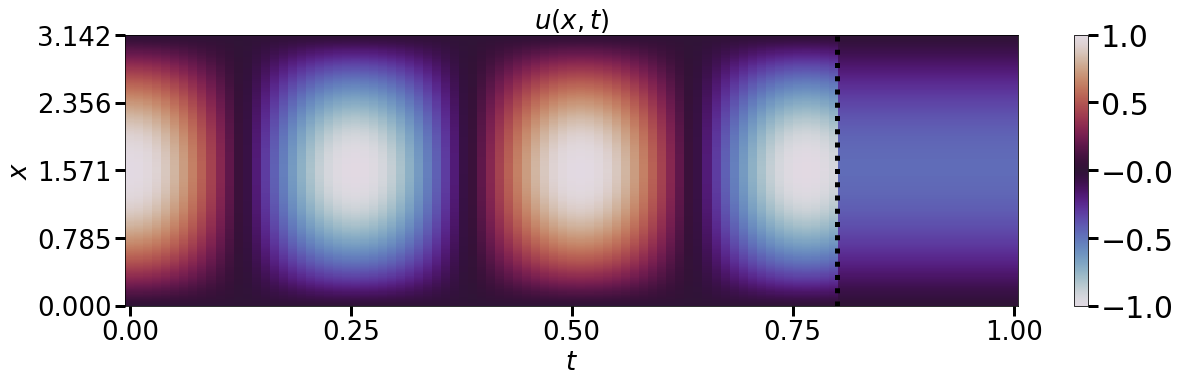

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(0, 1, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x1, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$u(x, t)$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=0.8, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_LSTM_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


In [22]:
x = np.linspace(0, np.pi, 256)
t = np.linspace(0, 1, 100)
t[-2]

0.98989898989899

In [23]:
### snapshots

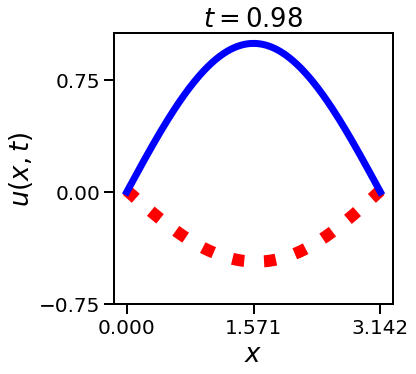

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[-2, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[-2, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.98}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([0, np.pi/2, np.pi])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('LSTM_0.98_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()


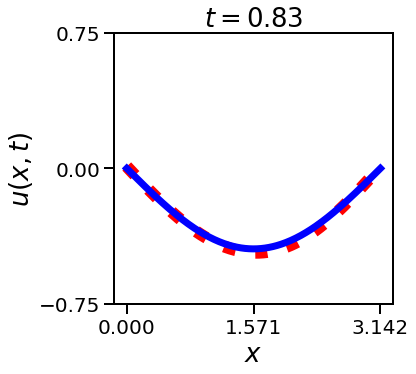

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed



final_time_output = prediction_tensor[3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = u_exact[83, :].reshape(-1, 1)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x, final_true, color='blue', linestyle='solid', linewidth=7, label='True')


# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 0.83}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([ 0, np.pi/2, np.pi])
ax.set_yticks([-0.75, 0, 0.75])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Set the legend
# ax.legend()

plt.savefig('LSTM_0.83_20.pdf', dpi=500, bbox_inches="tight")
#plt.savefig('lem_0.98_20.png', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
